In [1]:
import pickle
import pandas as pd
from IPython.display import Image, display

from main import exp1, exp2, exp3, exp4, exp5, exp6, exp7, exp8, mlp_grid_search, regularization_grid_search
from utils.plotting import compare_training_histories, plot_training_history, compare_accuracies

In [2]:
# run experiments or load results
RUN_EXP = False

# Experiment 0: Hyperparameter Testing

## MLP Hyperparameter Testing

We tested various hyperparameters for our model by splitting the training data into a training and development set. We selected baseline parameters by choosing the parameters which had the best validation accuracy.

In [32]:
param_grid = {'epochs': [50, 100],
                      'batch_size': [64, 128, 256],
                      'lr': [0.01, 0.001],
                      'decay': [1e-6, 1e-7],
                      'momentum': [0.9, 0.95],
                      }
RUN_EXP=False
results = mlp_grid_search(param_grid, RUN_EXP=RUN_EXP)
results.head(10)

Unnamed: 0  epochs  batch_size     lr  momentum         decay  \
11          11      50         128  0.010      0.95  1.000000e-07   
7            7      50          64  0.001      0.95  1.000000e-07   
30           6     100          64  0.001      0.95  1.000000e-06   
24           0     100          64  0.010      0.90  1.000000e-06   
1            1      50          64  0.010      0.90  1.000000e-07   
8            8      50         128  0.010      0.90  1.000000e-06   
9            9      50         128  0.010      0.90  1.000000e-07   
39          15     100         128  0.001      0.95  1.000000e-07   
41          17     100         256  0.010      0.90  1.000000e-07   
16          16      50         256  0.010      0.90  1.000000e-06   

    val_accuracy  
11      0.885222  
7       0.883778  
30      0.883444  
24      0.883111  
1       0.881889  
8       0.881444  
9       0.881444  
39      0.880111  
41      0.879778  
16      0.879667

## Regularization Hyperparameter Testing

Using the baseline parameters from the MLP search, we also experimented with various regularization parameters for the L1 and L2 regularization.

In [33]:
param_grid = {'epochs': [50],
              'batch_size': [128],
              'lr': [0.01],
              'decay': [1e-7],
              'momentum': [0.95],
              'regularization': ['l1', 'l2'],
              'lambd': [5e-3, 1e-3, 1e-4]}

RUN_EXP=False
results = regularization_grid_search(param_grid, RUN_EXP=RUN_EXP)
results.head(10)

epochs  batch_size    lr  momentum         decay regularization   lambd  \
4      50         128  0.01      0.95  1.000000e-07             l2  0.0010   
5      50         128  0.01      0.95  1.000000e-07             l2  0.0001   
2      50         128  0.01      0.95  1.000000e-07             l1  0.0001   
3      50         128  0.01      0.95  1.000000e-07             l2  0.0050   
1      50         128  0.01      0.95  1.000000e-07             l1  0.0010   
0      50         128  0.01      0.95  1.000000e-07             l1  0.0050   

   val_accuracy  
4      0.881889  
5      0.879444  
2      0.878111  
3      0.867000  
1      0.831667  
0      0.777444

# Experiment 1: Weight Initialization

The first experiment considered the effect of weight initialization on convergence rate and final performance for our baseline model on the Fashion MNIST dataset. We initialized the weights as: all zeros, Uniform [-1, 1], Gaussian N(0,1), Xavier and Kaiming. The models with Xavier and Kaiming initializations had the best final accuracy and we also the fastest to converge, with final performances stabilizing around the 25th epoch. This is consistent with the motivation for these initializers. When all weights are initialized to zero, the model predicts the zero-th class at each step.

### Run Experiment

In [34]:
RUN_EXP = False
if RUN_EXP:
    optimizer_kwargs = {
        'lr': 0.01, 
        'momentum': 0.95,
        'decay': 1e-7
        }
    optimizer = 'SGD'
    batch_size = 128
    epochs = 50

    exp1(optimizer_kwargs, optimizer_name=optimizer, epochs=epochs, batch_size=batch_size, verbose=False)

### Results

Final accuracies:
Model 1: ('Zeros', 0.1, 0.1)
Model 2: ('Uniform', 0.8905666666666666, 0.8535)
Model 3: ('Gaussian', 0.85845, 0.8295)
Model 4: ('Xavier', 0.966, 0.8861)
Model 5: ('Kaiming', 0.9304, 0.8673)


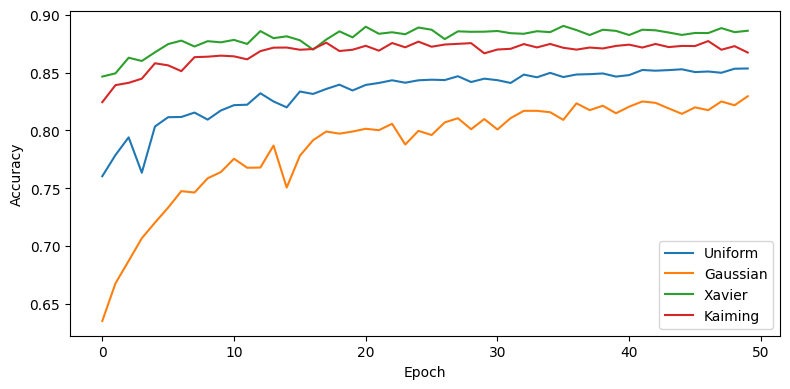

In [35]:
try:
    histories = pickle.load(open('out/exp1/histories.pickle', 'rb'))
    final_accuracies = pickle.load(open('out/exp1/final_accuracies.pickle', 'rb'))
    titles = ['Zeros', 'Uniform', 'Gaussian', 'Xavier', 'Kaiming']

    print('Final accuracies:')
    for i, acc in enumerate(final_accuracies):
        print('Model {}: {}'.format(i+1, acc))

    # plots
    #compare_training_histories(histories, titles, show=True)
    #plot_training_history(histories[4], title=titles[4], show=True)
    compare_accuracies(histories[1:], titles[1:], figsize=(8,4), plot_train=False, show=True)
except FileNotFoundError:
    print('Experiment 1 results not found. Run experiment first.')

# Experiment 2: Hidden Layers
Create three different models: 
1. an MLP with no hidden layers, i.e., it directly maps the inputs to outputs,
2. an MLP with a single hidden layer having 128 units and ReLU activations,
3. an MLP with 2 hidden layers each having 128 units with ReLU activations. 

It should be noted that since we want to perform classification, all of these models should have a softmax layer at the end. After training, compare the test accuracy of these three models on the Fashion MNIST dataset. Comment on how non-linearity and network depth affects the accuracy. Are the results that you obtain expected?


### Run Experiment

In [36]:
RUN_EXP = False
if RUN_EXP:
    optimizer_kwargs = {
        'lr': 0.01, 
        'momentum': 0.95,
        'decay': 1e-7
        }
    optimizer = 'SGD'
    batch_size = 128
    epochs = 25
    exp2(optimizer_kwargs, optimizer_name=optimizer, epochs=epochs, batch_size=batch_size, verbose=False)

### Results

For our next experiment, we tested the effect of the number of hidden layers on the final performance. By adding extra layers to our model, we expected that both the model's accuracy on the training data, as well as its ability to overfit, would increase. This was consistent with our experimental results. The models with hidden layers outperformed the model with no hidden layers, both on the training and testing sets. The model with two hidden layers showed slightly more signs of overfitting; as the difference between the training and testing accuracy increase at a faster rate during training. The accuracy between the models with one and two hidden layers was similar, with final test accuracies recorded at 86.46% and 87.62%, respectively.

Final accuracies:
No Hidden Layers: 0.8291
Single Hidden Layer: 0.8646
Two Hidden Layers: 0.8762


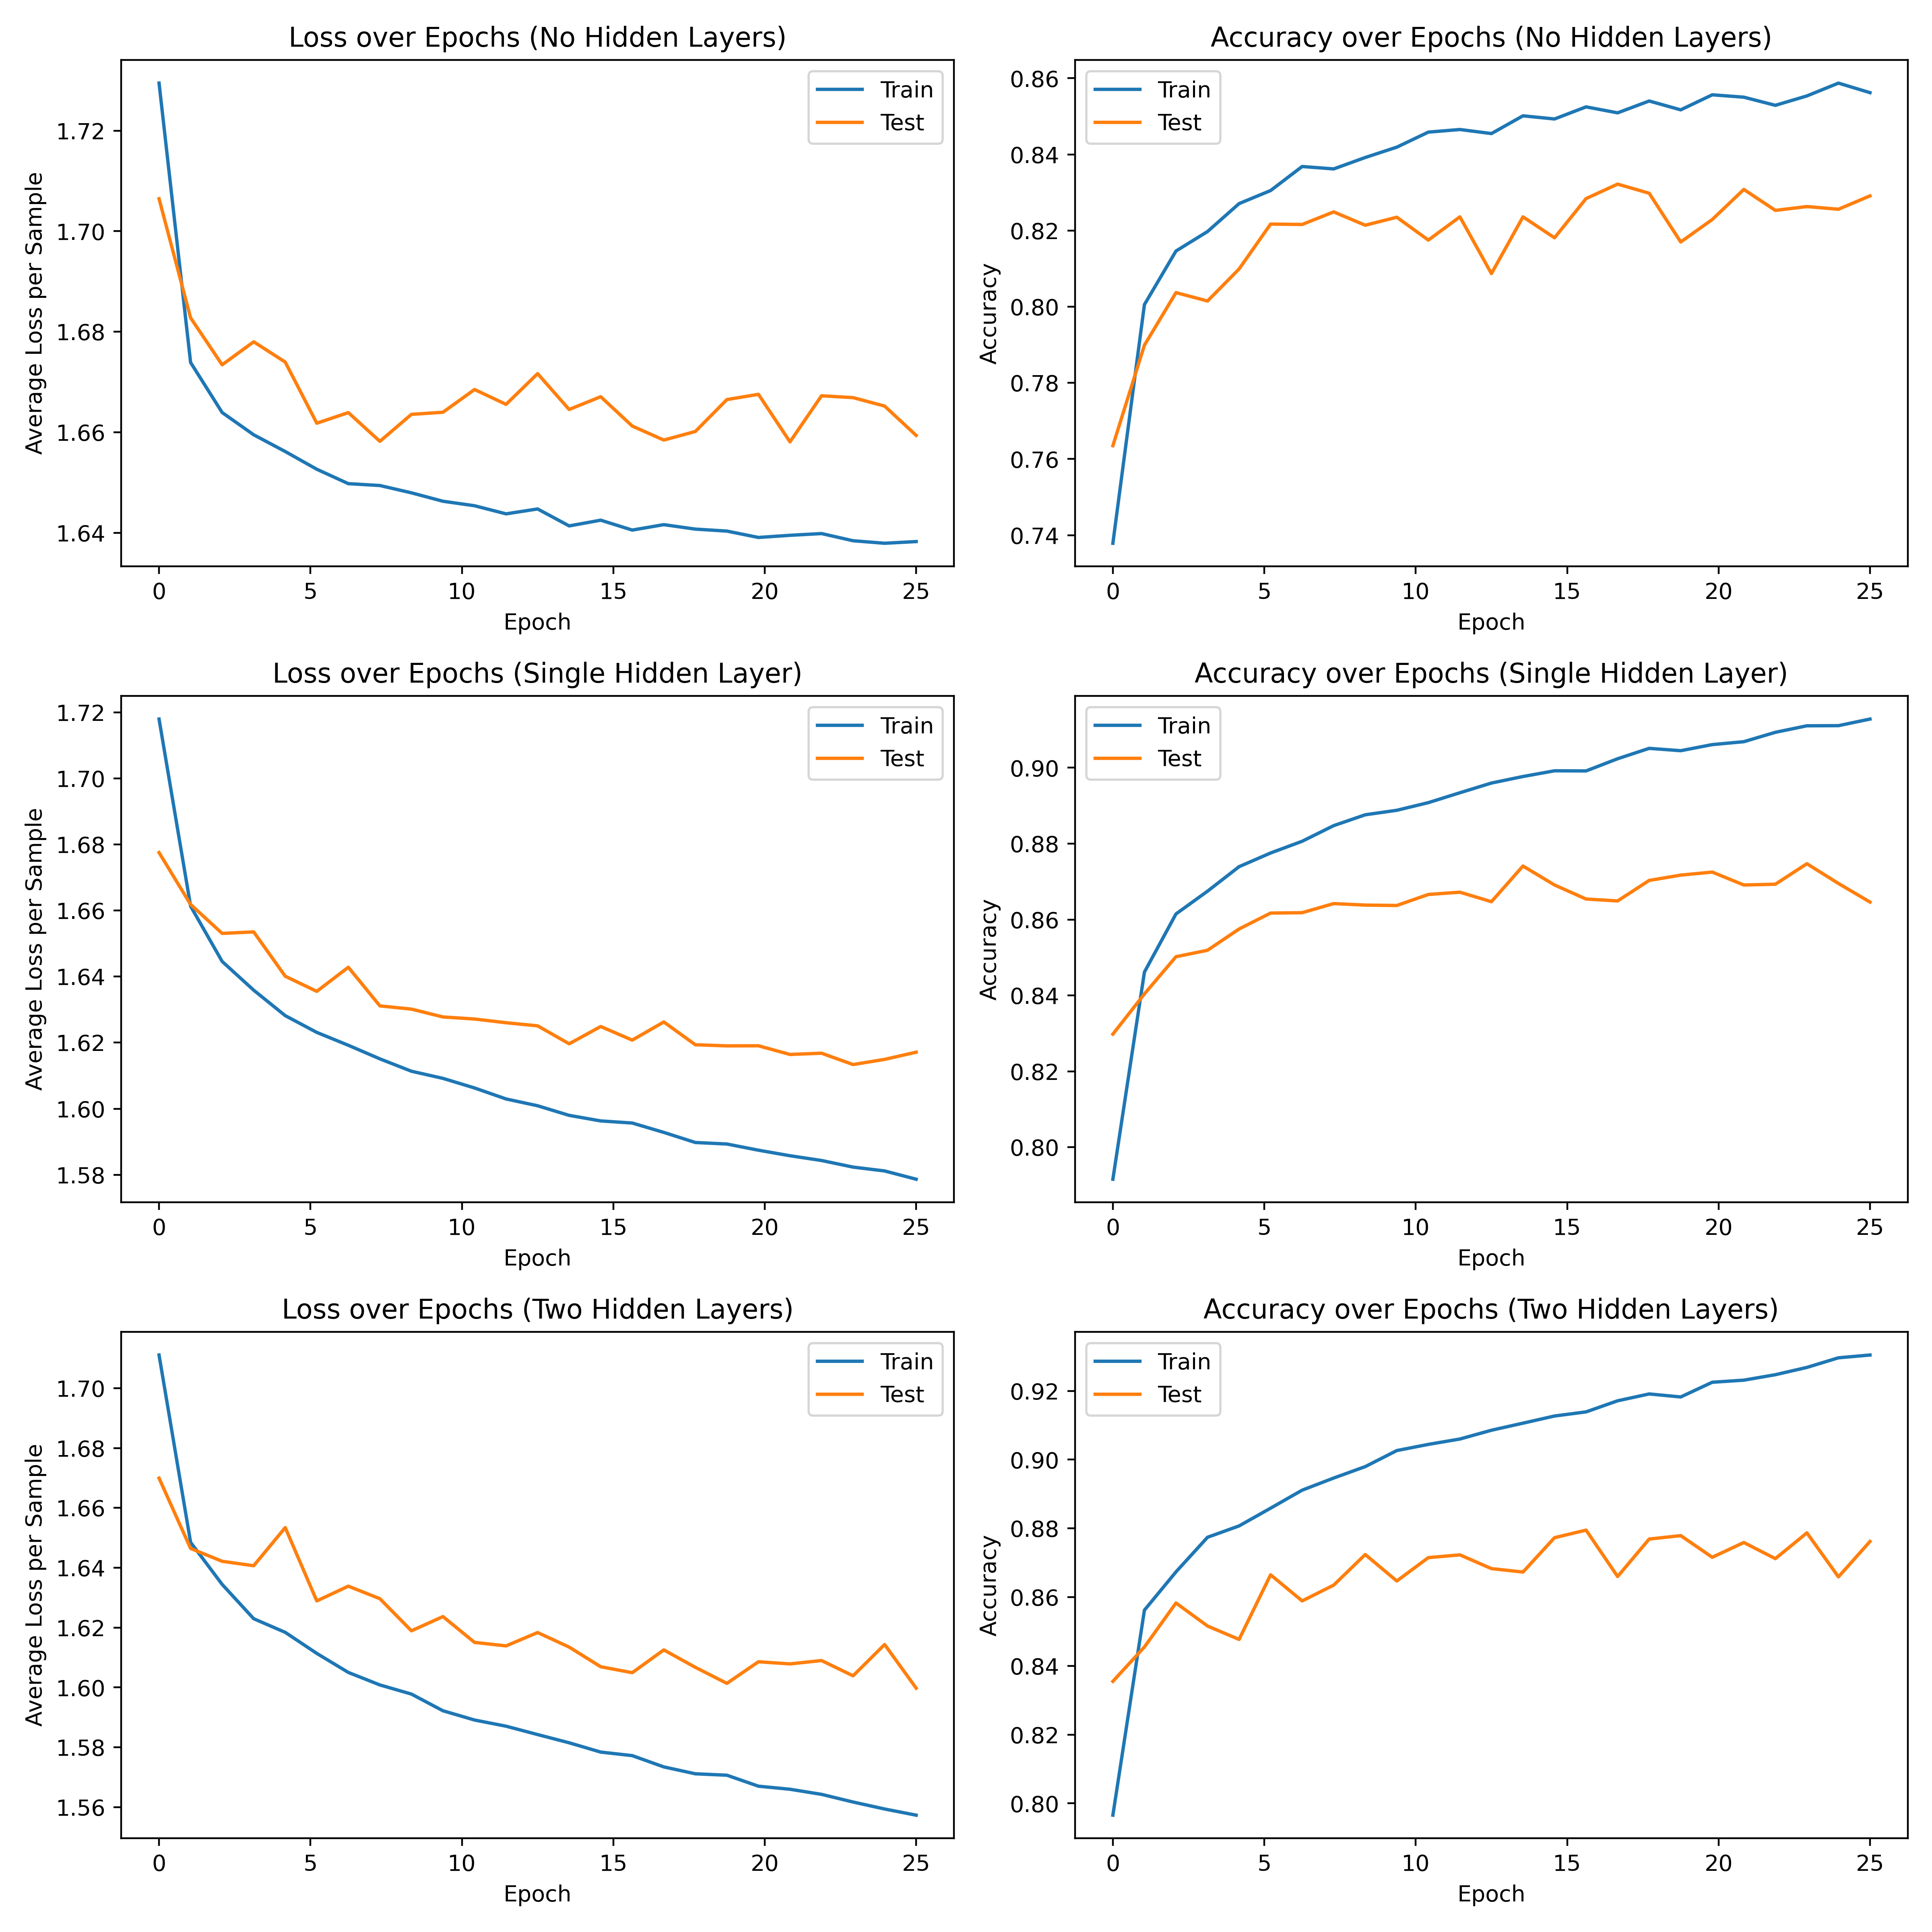

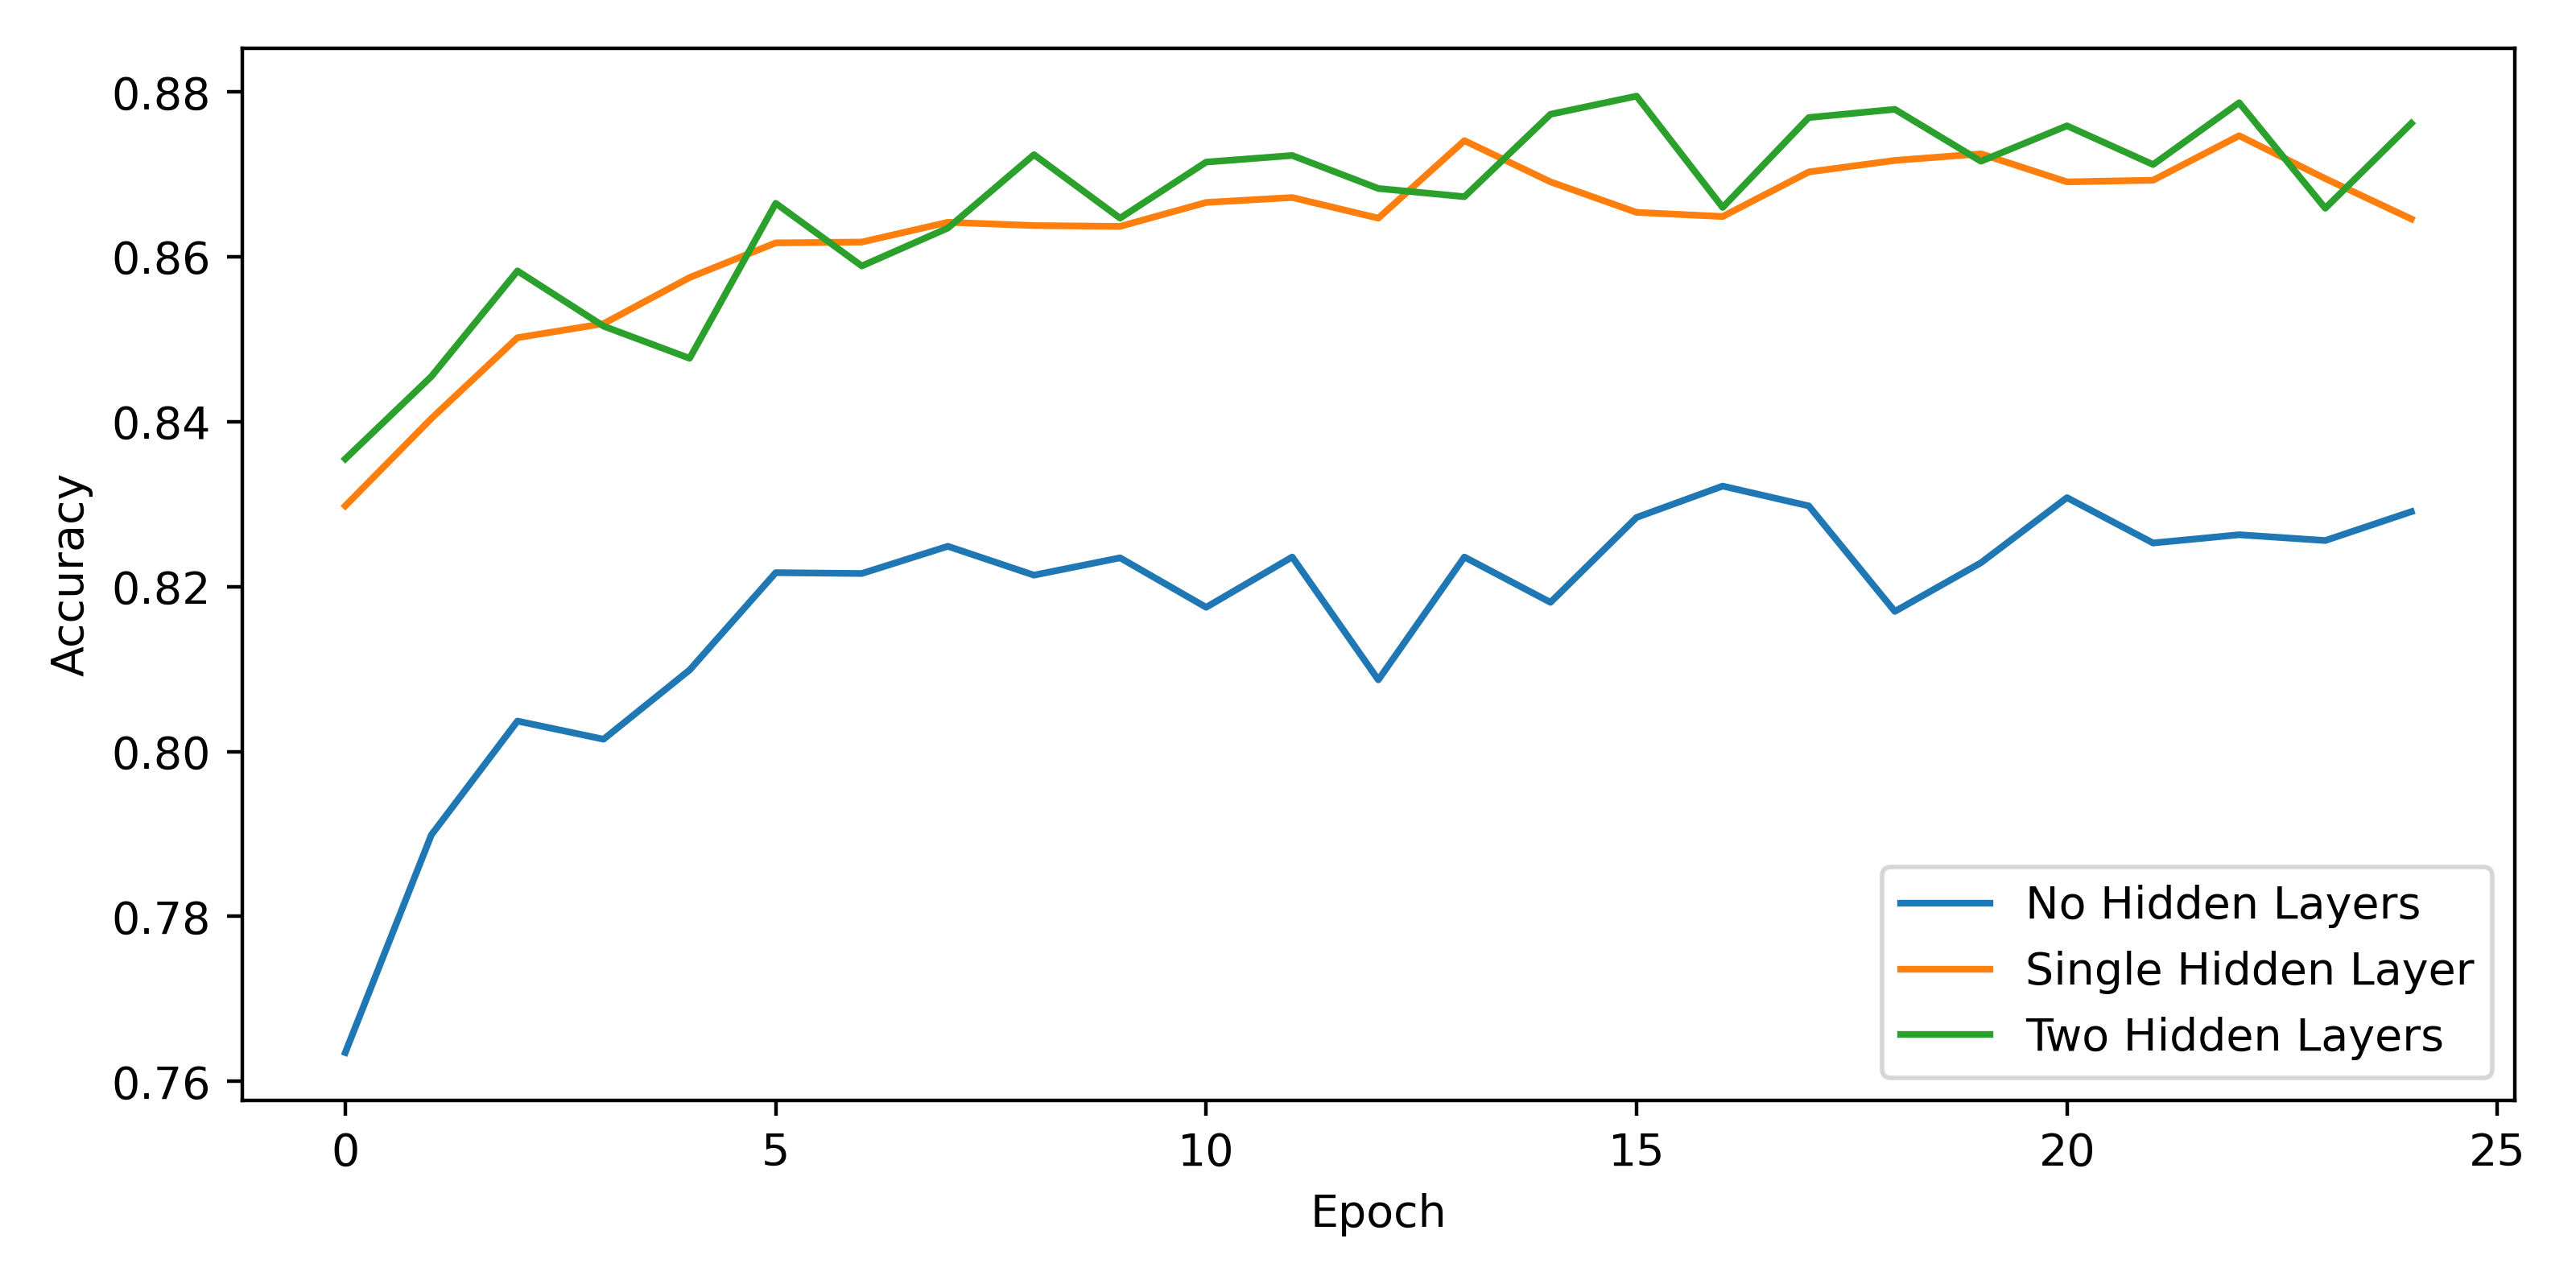

In [37]:
try:
    histories = pickle.load(open('out/exp2/histories.pickle', 'rb'))
    final_accuracies = pickle.load(open('out/exp2/final_accuracies.pickle', 'rb'))

    print('Final accuracies:')
    for model_name, acc in final_accuracies:
        print('{}: {}'.format(model_name, acc))

    # plots
    img_histories = Image(filename='out/exp2/training_histories.png') 
    img_accuracies = Image(filename='out/exp2/accuracies.png')
    display(img_histories, img_accuracies)
except FileNotFoundError:
    print('Experiment 2 results not found. Run experiment first.')

# Experiment 3: Activation Function

Take the last model above, the one with 2 hidden layers, and create two different copies of it in which you pick two activations of your choice (except ReLU) from the course slides. After training these two models on Fashion MNIST compare their test accuracies with the model with ReLU activations. Comment on the performances of these models: which one is better and why? Are certain activations better than others? If the results are not as you expected, what could be the reason?

### Run Experiment

In [38]:
RUN_EXP = False
if RUN_EXP:
    optimizer_kwargs = {
        'lr': 0.01, 
        'momentum': 0.95,
        'decay': 1e-7
        }
    optimizer = 'SGD'
    batch_size = 128
    epochs = 25
    exp3(optimizer_kwargs, optimizer_name=optimizer, epochs=epochs, batch_size=batch_size, verbose=False)

### Results

For the model with two hidden layers, we then compared the effect of different activation functions on the convergence rate and overall performance. The model with Logistic activations performed noticably worse than the models with TanH and ReLU activations. Overall, the model with ReLU activations performed best.

Final test accuracies:
Model with Logistic activation function: 0.8425

Model with Tanh activation function: 0.8757

Model with ReLU activation function: 0.8806



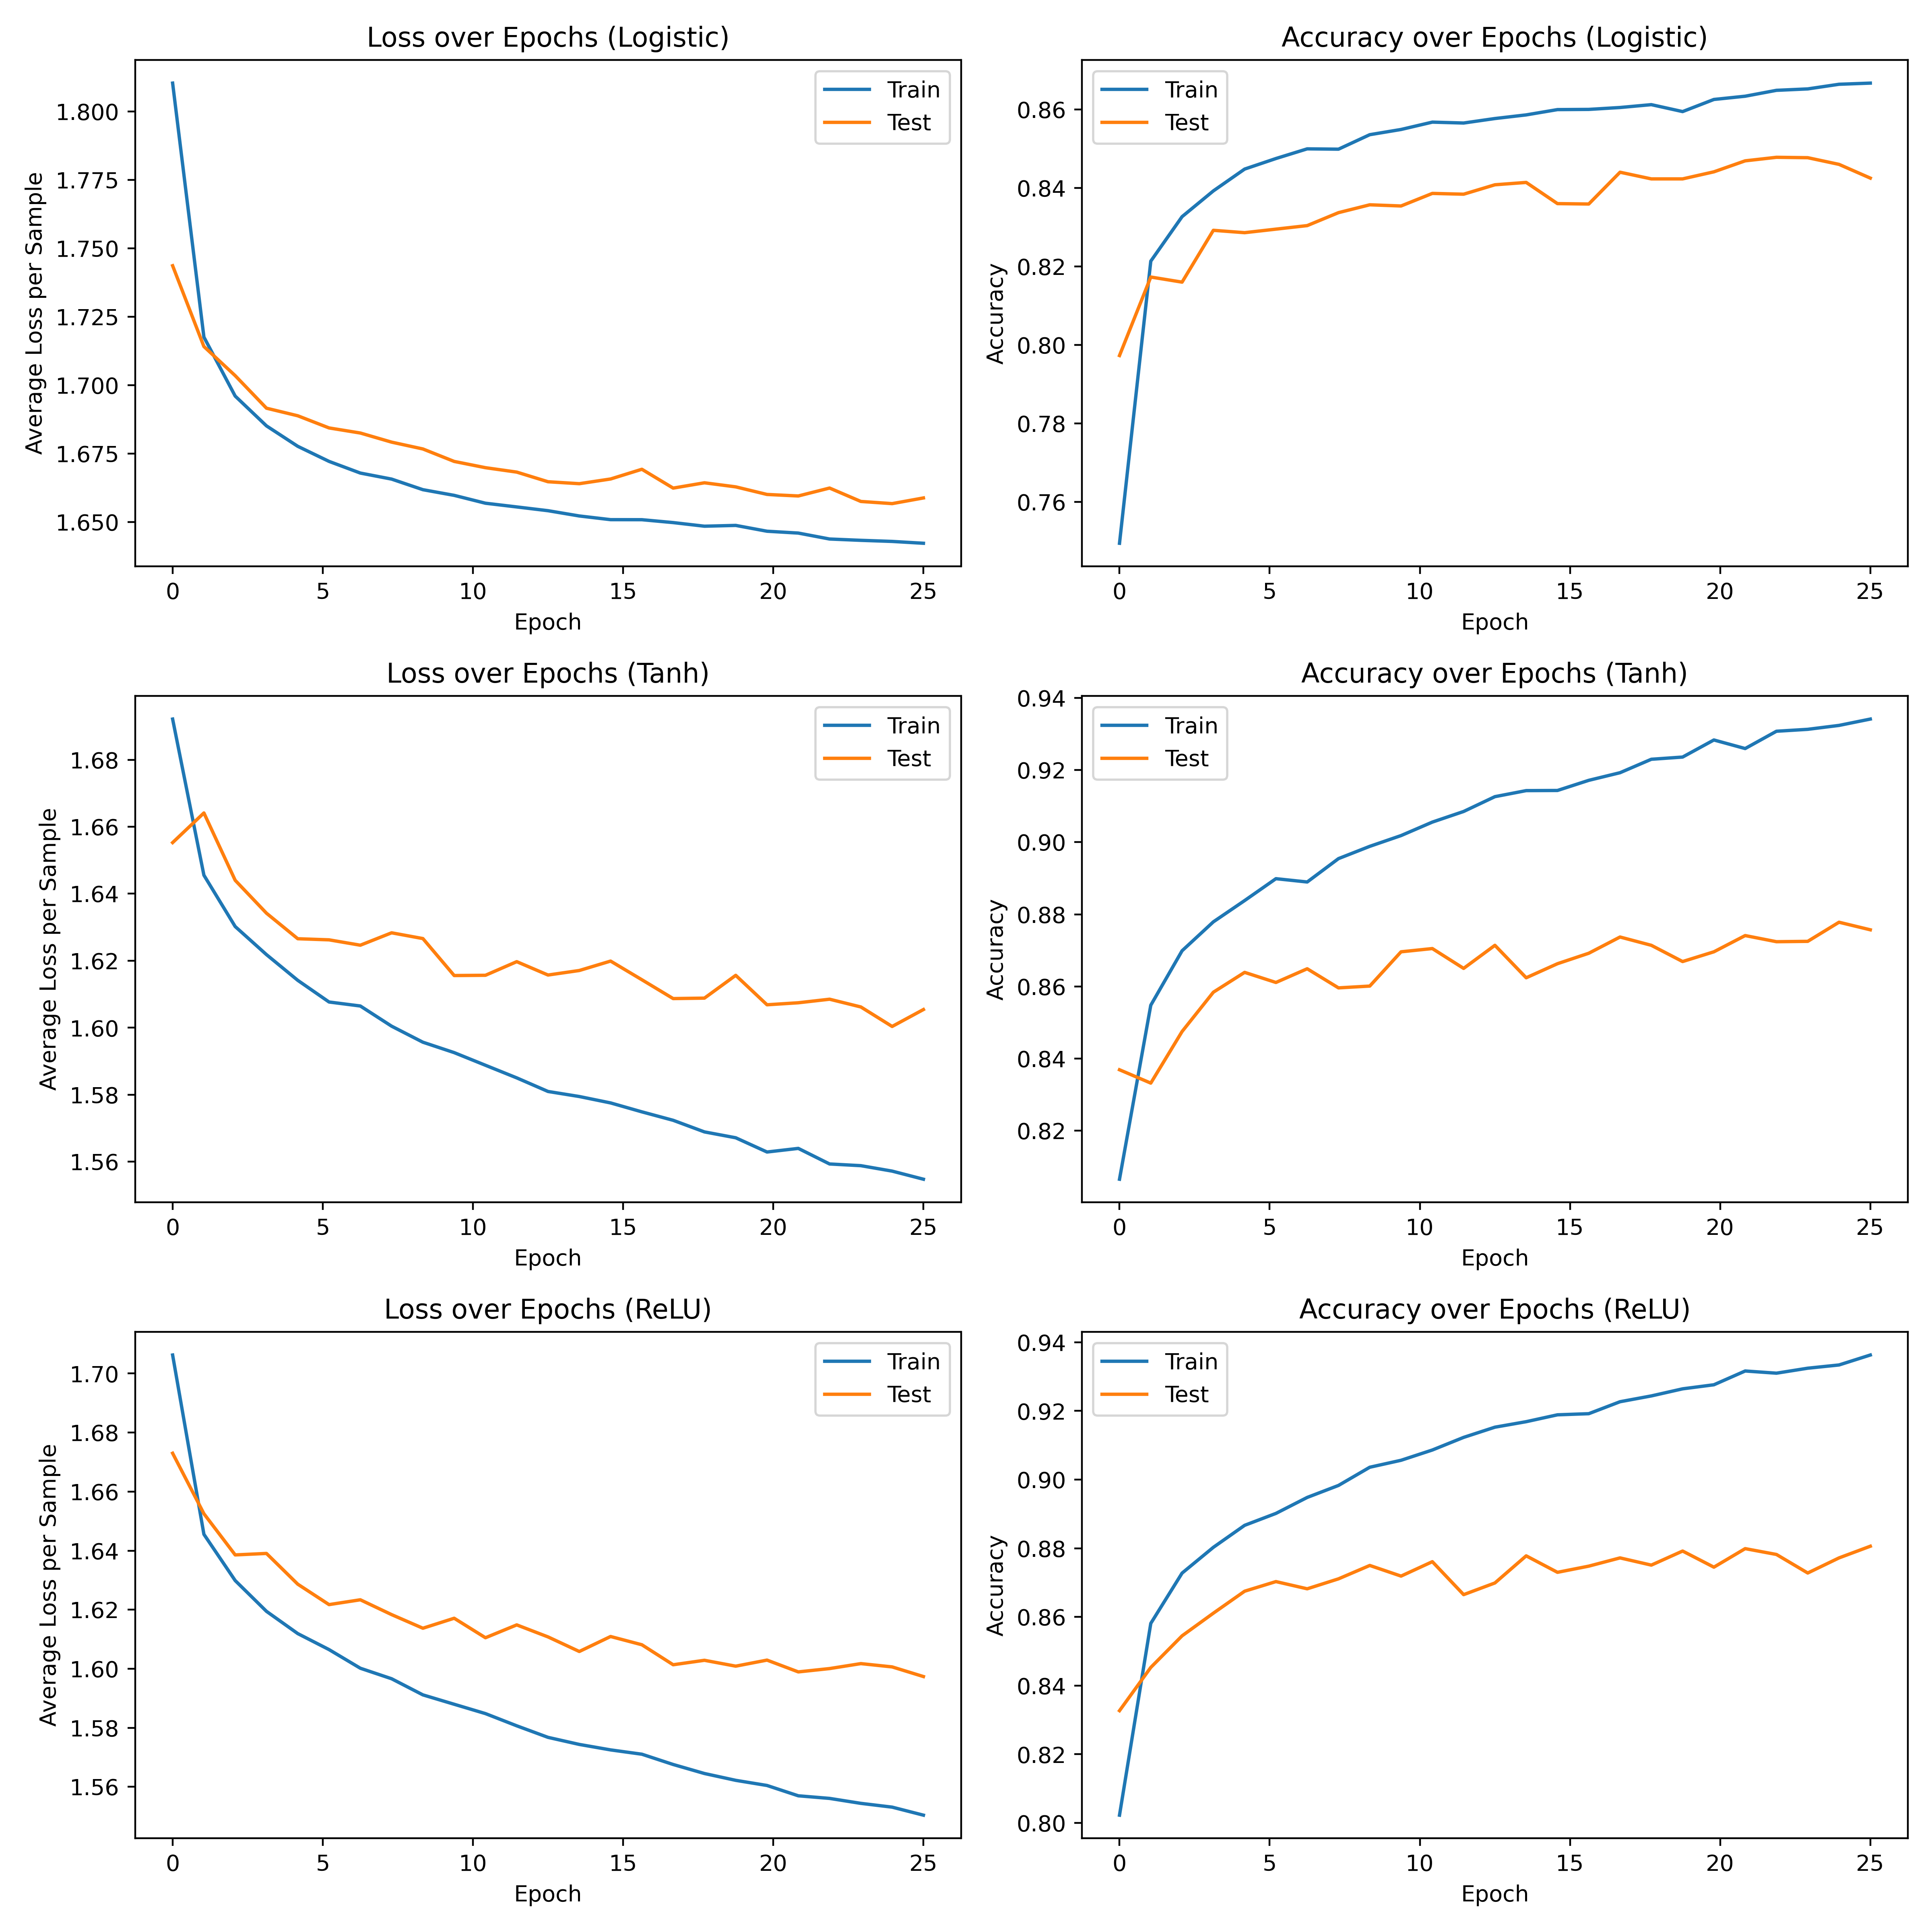

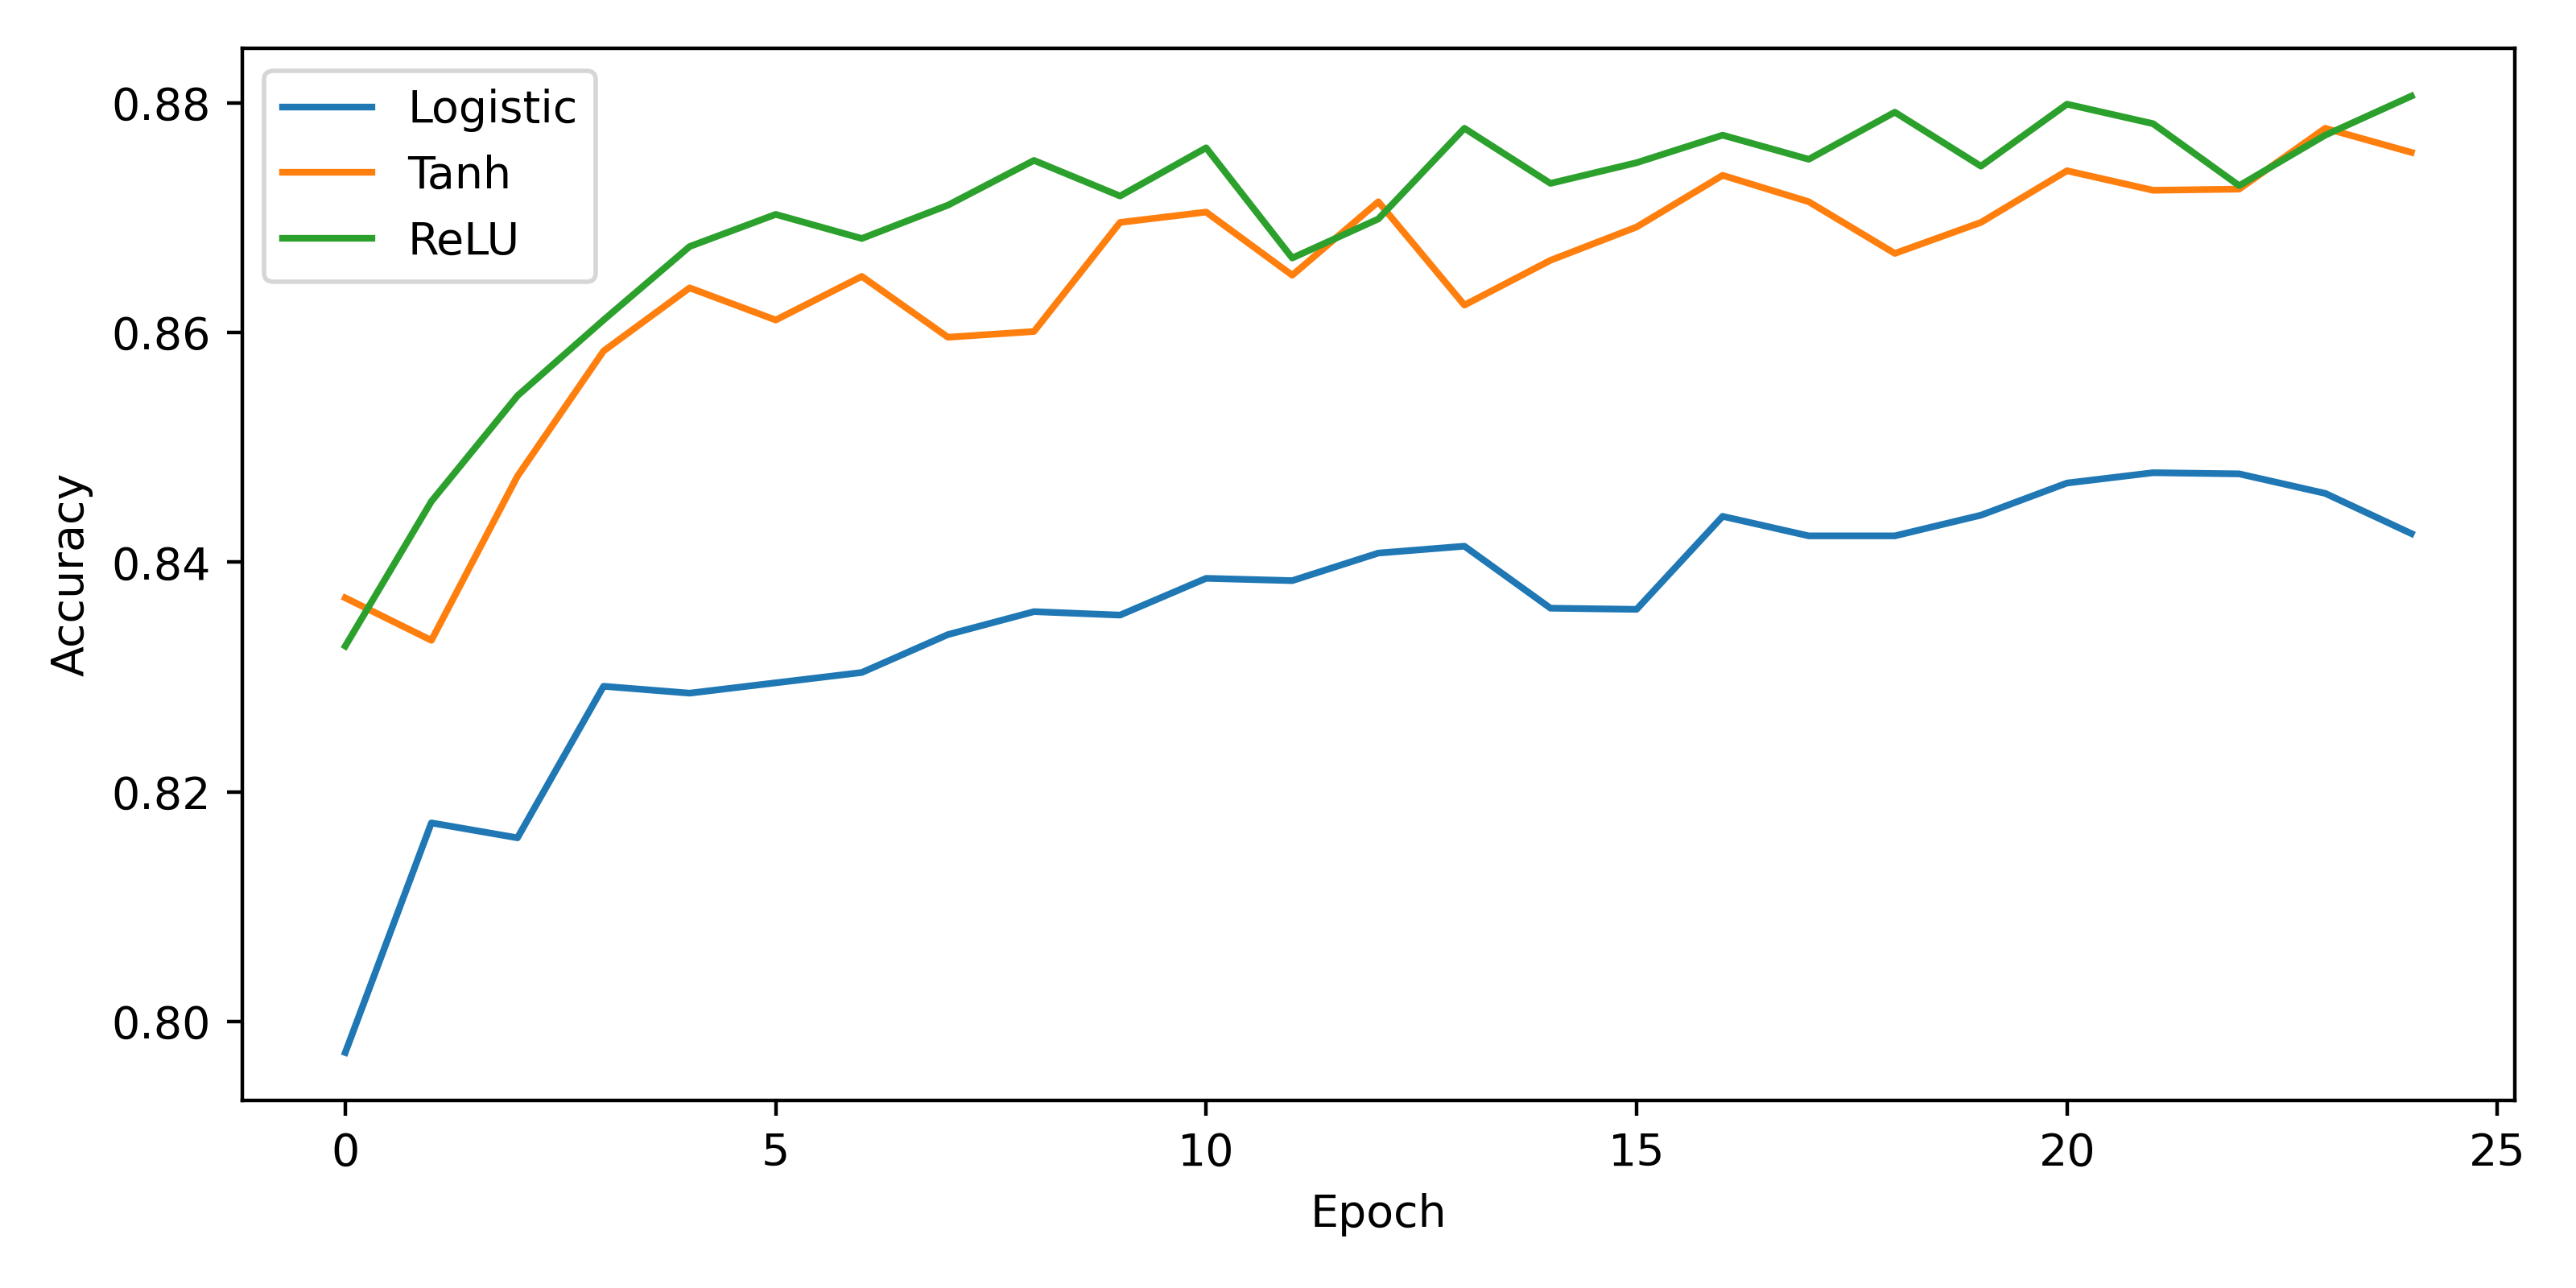

In [39]:
try: 
    histories = pickle.load(open('out/exp3/histories.pickle', 'rb'))
    final_accuracies = pickle.load(open('out/exp3/final_accuracies.pickle', 'rb'))

    print('Final test accuracies:')
    for activation_name, acc in final_accuracies:
        print(f"Model with {activation_name} activation function: {acc:.4f}\n")

    # plots
    img_histories = Image(filename='out/exp3/training_histories.png') 
    img_accuracies = Image(filename='out/exp3/accuracies.png')
    display(img_histories, img_accuracies)

except FileNotFoundError:
    print('Experiment 3 results not found. Run experiment first.')

# Experiment 4: Regularization
Create an MLP with 2 hidden layers each having 128 units with ReLU activations as above. However, this time, independently add L1 and L2 regularization to the network and train the MLP in this way. How do these regularizations affect the accuracy? (This proportion can be varied as a tunable hyperparameter that can be explored as part of other project requirements)

### Run Experiment

In [5]:
if RUN_EXP:
    optimizer_kwargs = {
        'lr': 0.01, 
        'momentum': 0.95,
        'decay': 1e-7,
        'lambd': 0.0001
        }
    optimizer = 'SGD'
    batch_size = 128
    epochs = 50
    exp4(optimizer_kwargs, optimizer_name=optimizer, epochs=epochs, batch_size=batch_size)

### Results

Final test accuracies:
Model with None: 0.8736

Model with l1: 0.8669

Model with l2: 0.8801



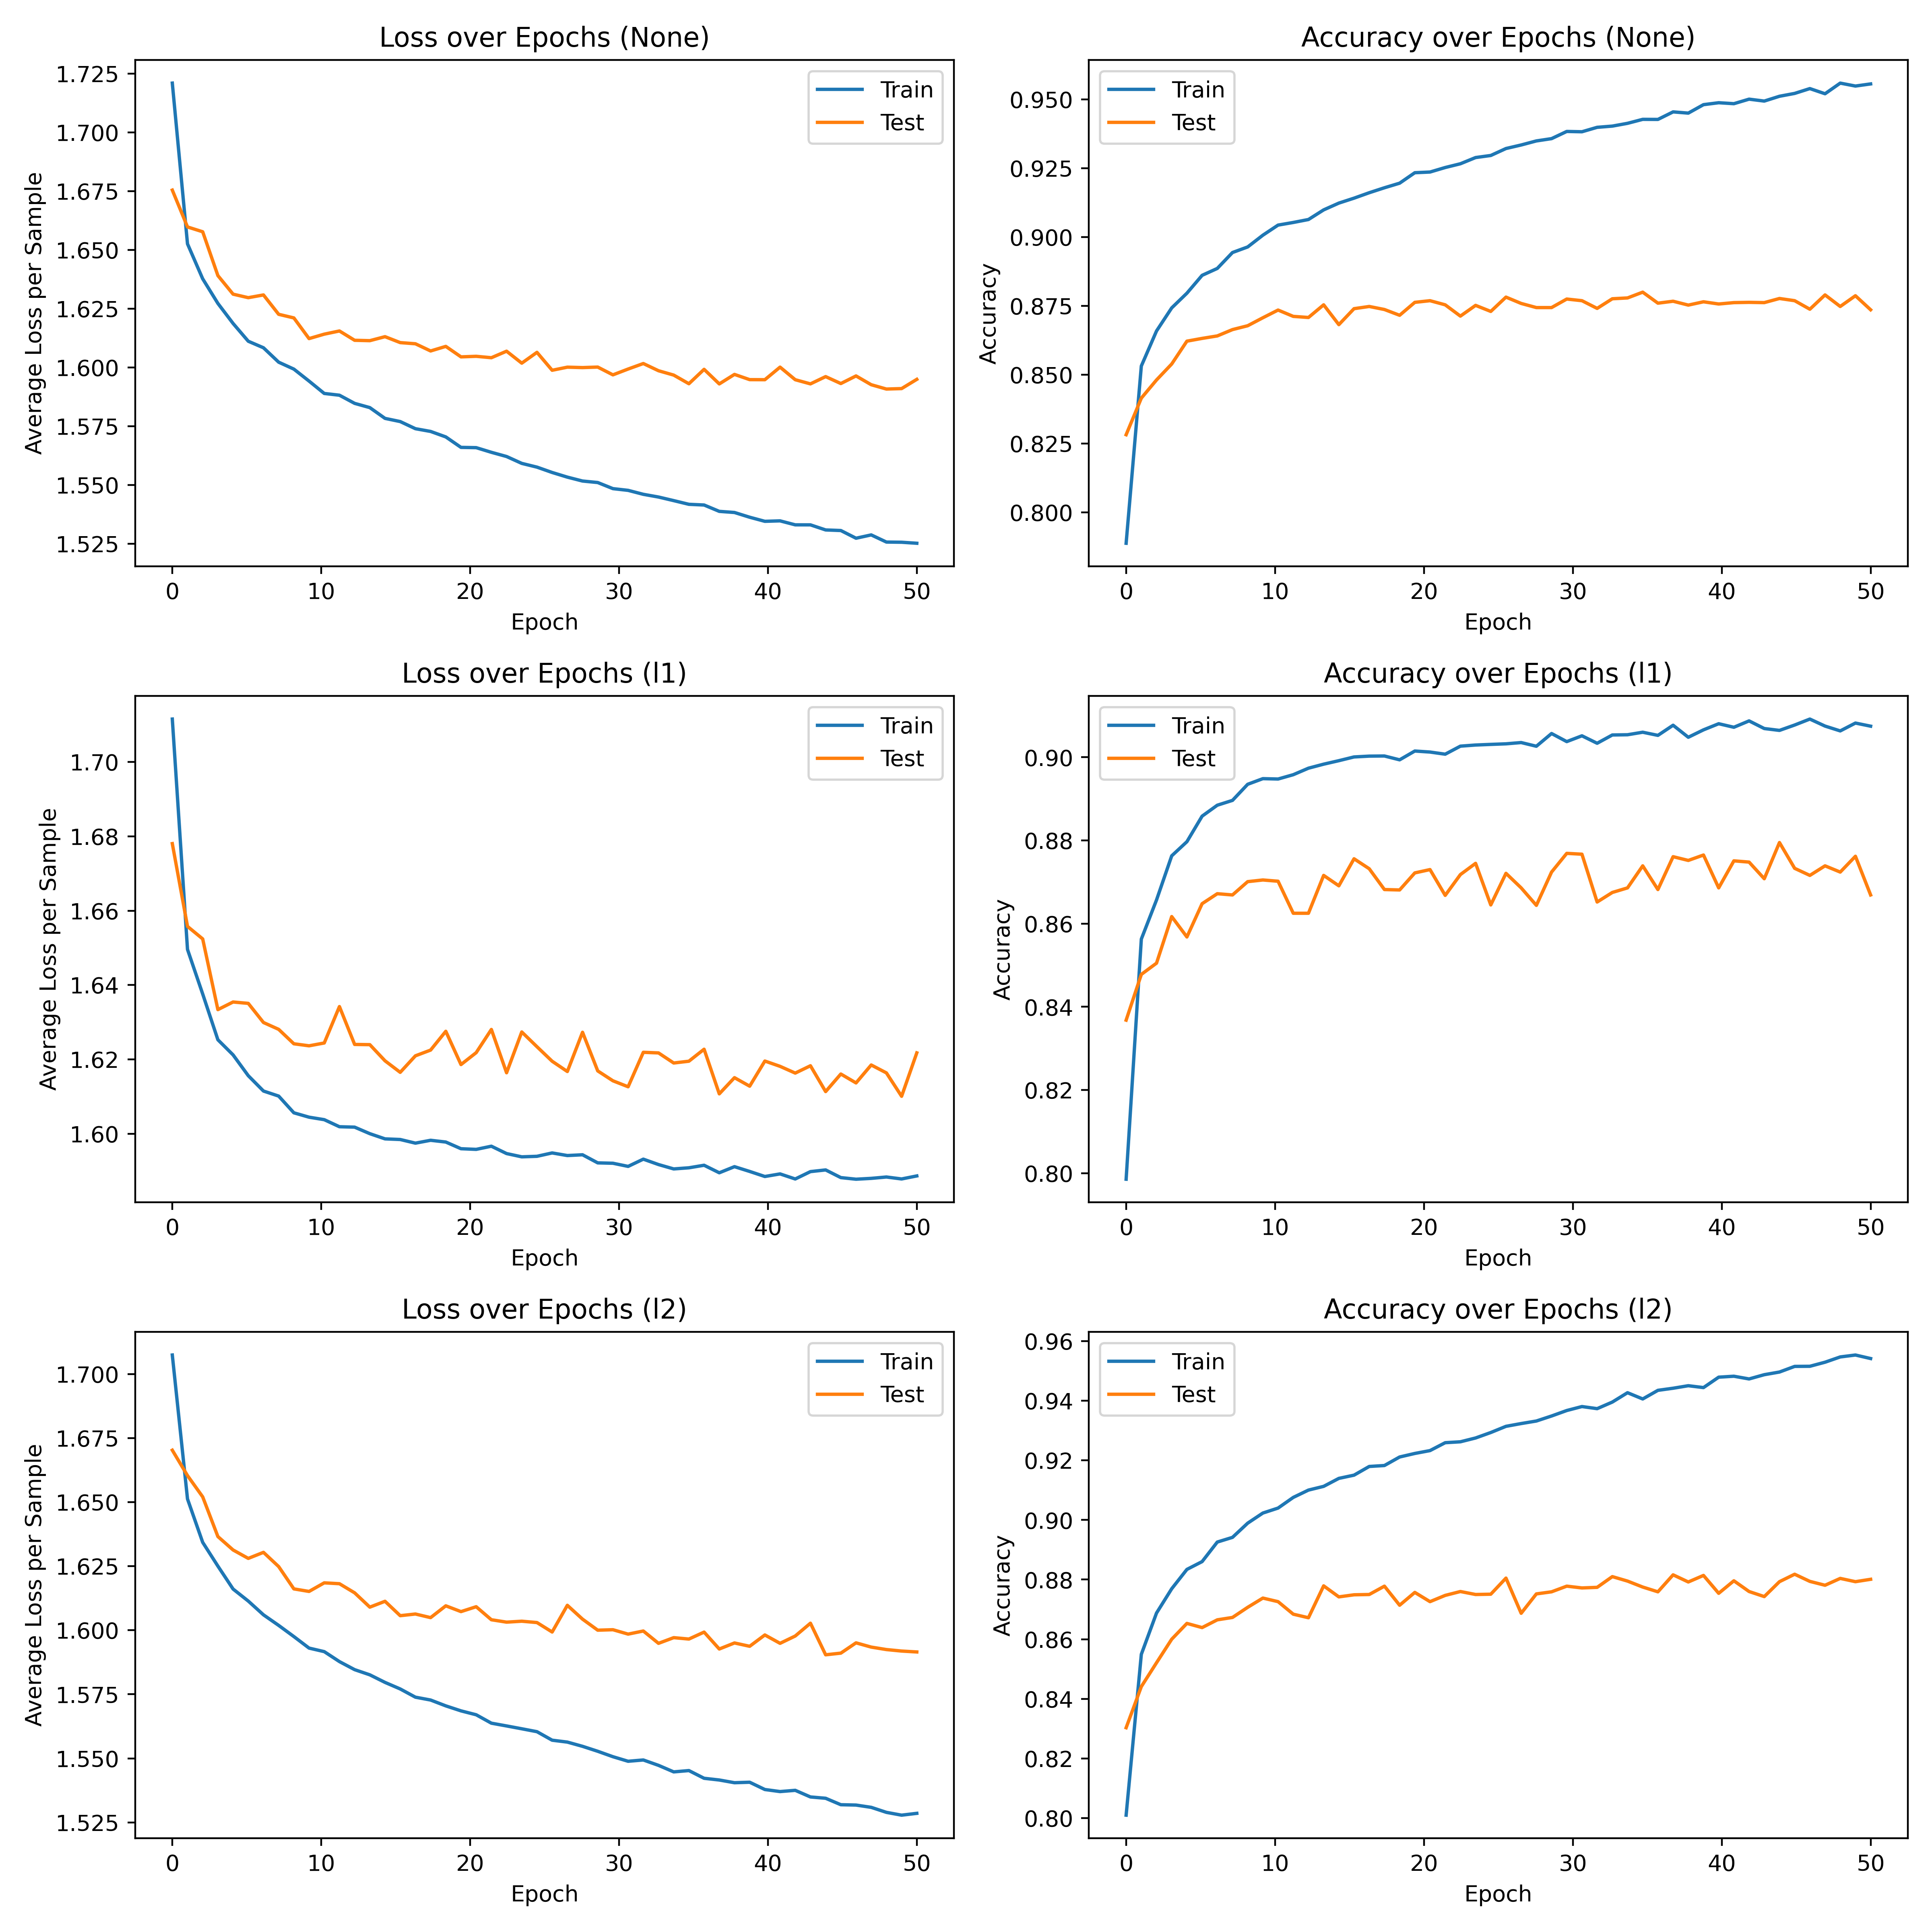

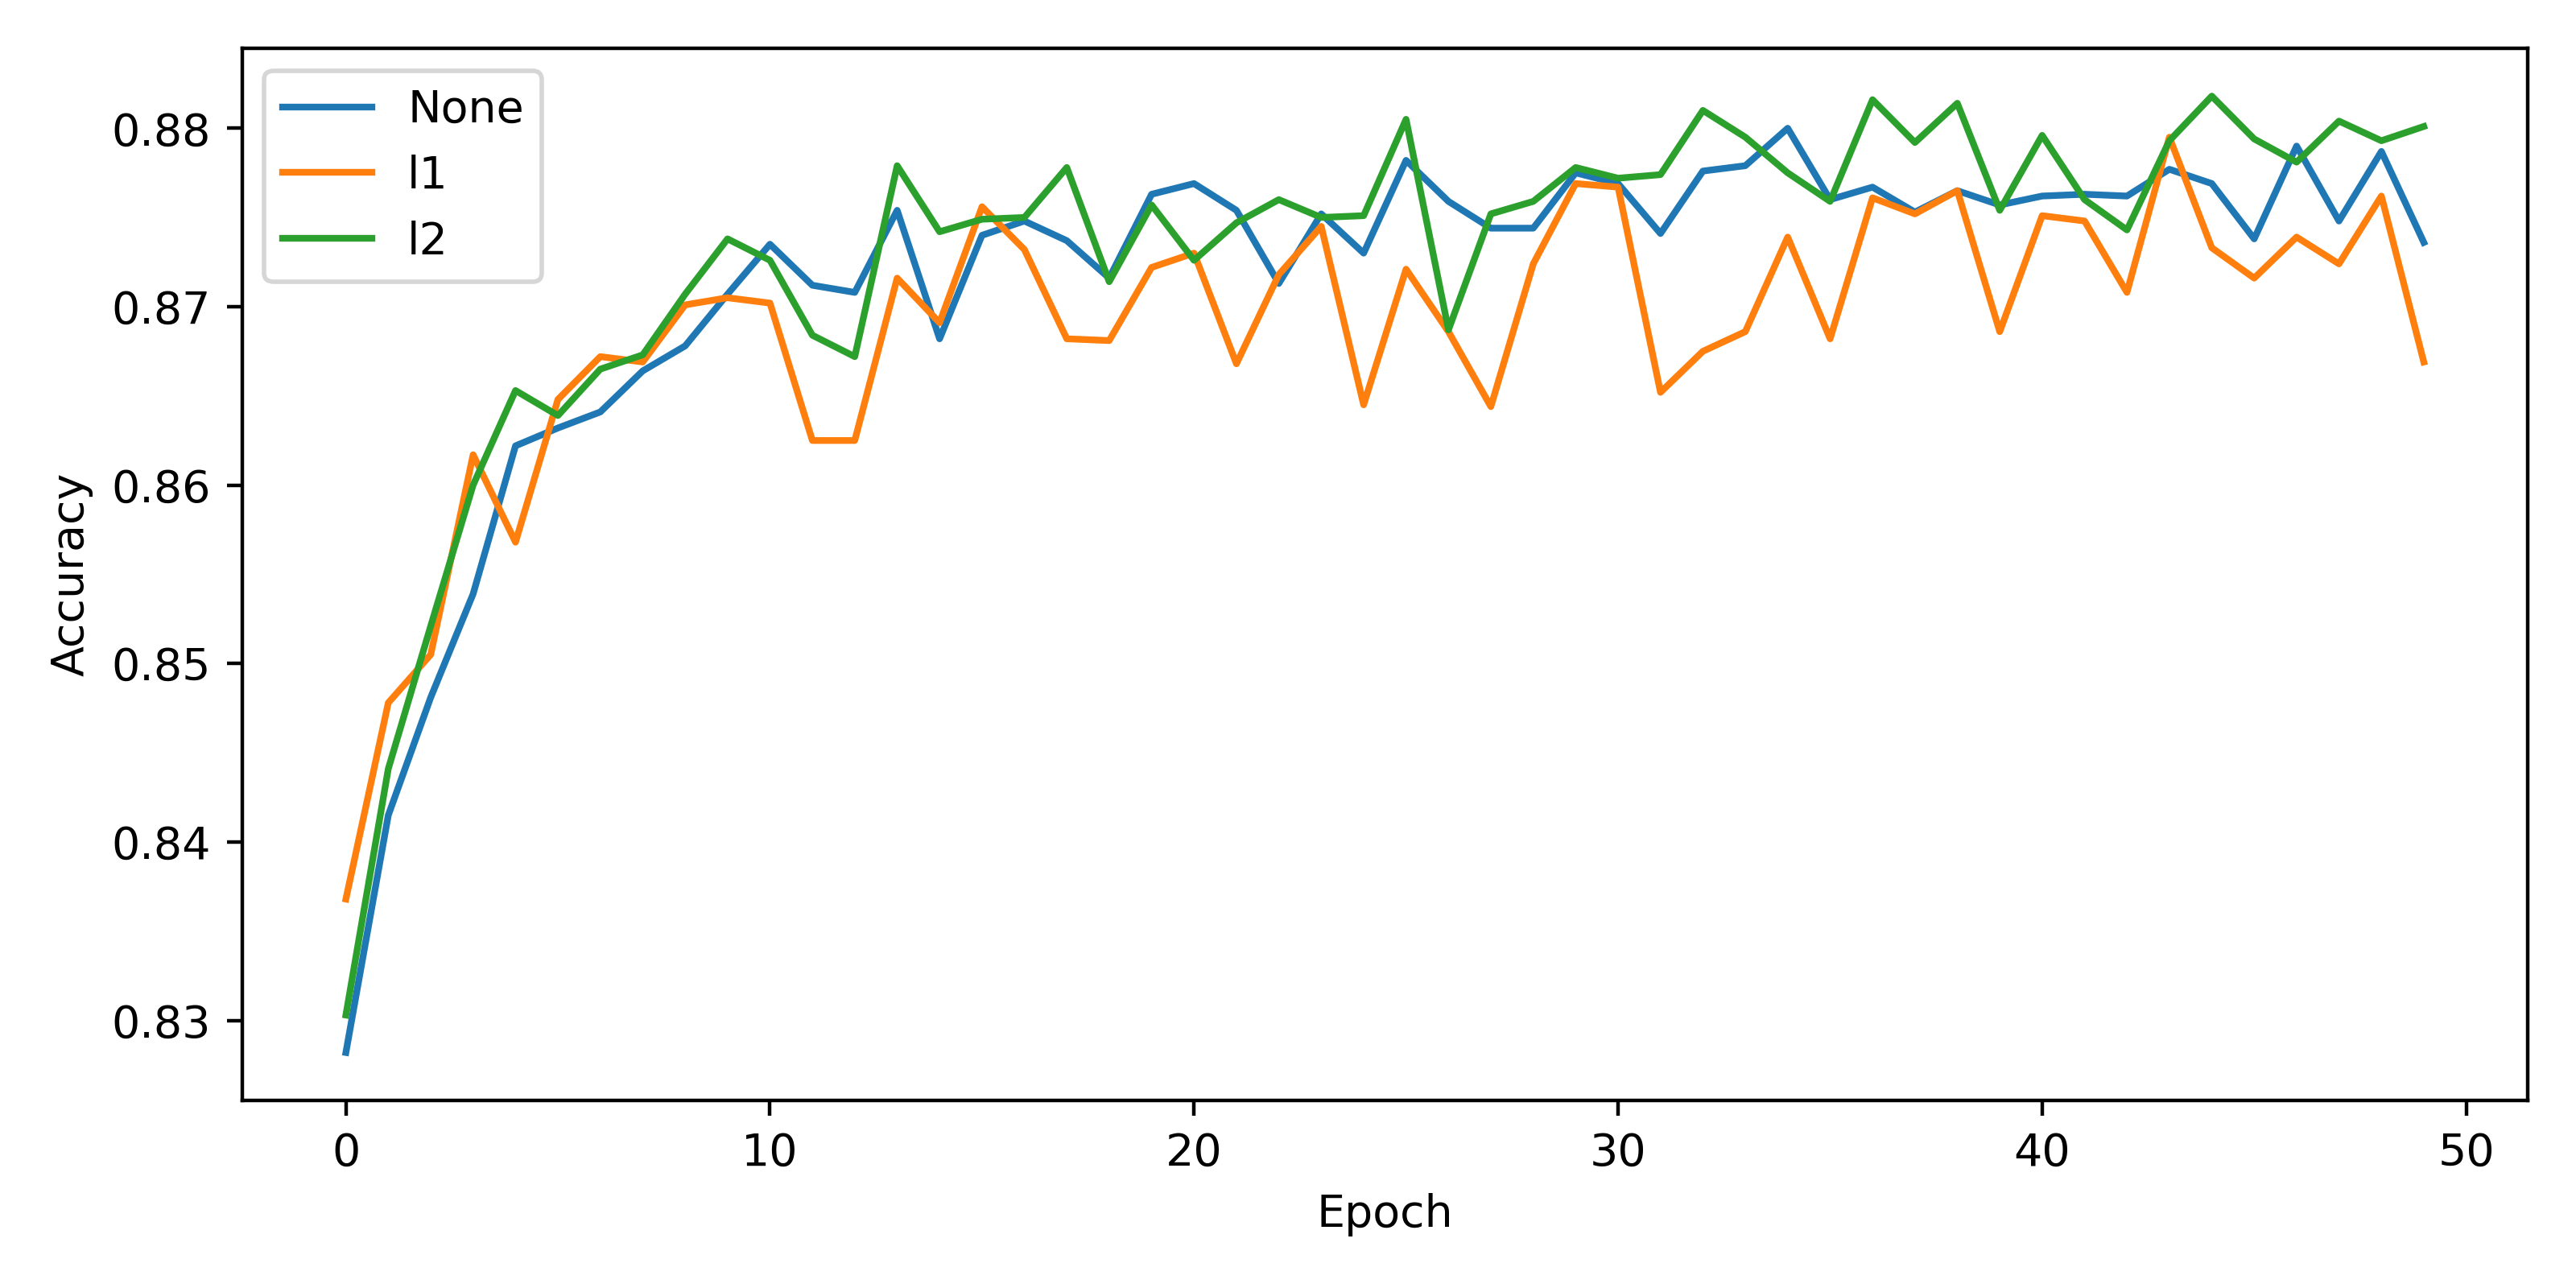

In [41]:
try:
    histories = pickle.load(open('out/exp4/histories.pickle', 'rb'))
    final_accuracies = pickle.load(open('out/exp4/final_accuracies.pickle', 'rb'))

    print('Final test accuracies:')
    for regularization_name, acc in final_accuracies:
        print(f"Model with {regularization_name}: {acc:.4f}\n")

    # plots
    img_histories = Image(filename='out/exp4/training_histories.png') 
    img_accuracies = Image(filename='out/exp4/accuracies.png')
    display(img_histories, img_accuracies)

except FileNotFoundError:
    print('Experiment 4 results not found. Run experiment first.')

# Experiment 5: Data Normalization
Create an MLP with 2 hidden layers each having 128 units with ReLU activations as above. However, this time, train it with unnormalized images. How does this affect the accuracy?

### Run Experiment

In [42]:
if RUN_EXP:
    optimizer_kwargs = {
        'lr': 0.01, 
        'momentum': 0.95,
        'decay': 1e-7
        }
    optimizer = 'SGD'
    batch_size = 128
    epochs = 25
    exp5(optimizer_kwargs, optimizer_name=optimizer, epochs=epochs, batch_size=batch_size, verbose=False)

### Results

Final test accuracies:
Model with Norm flag True: 0.8791

Model with Norm flag False: 0.1000



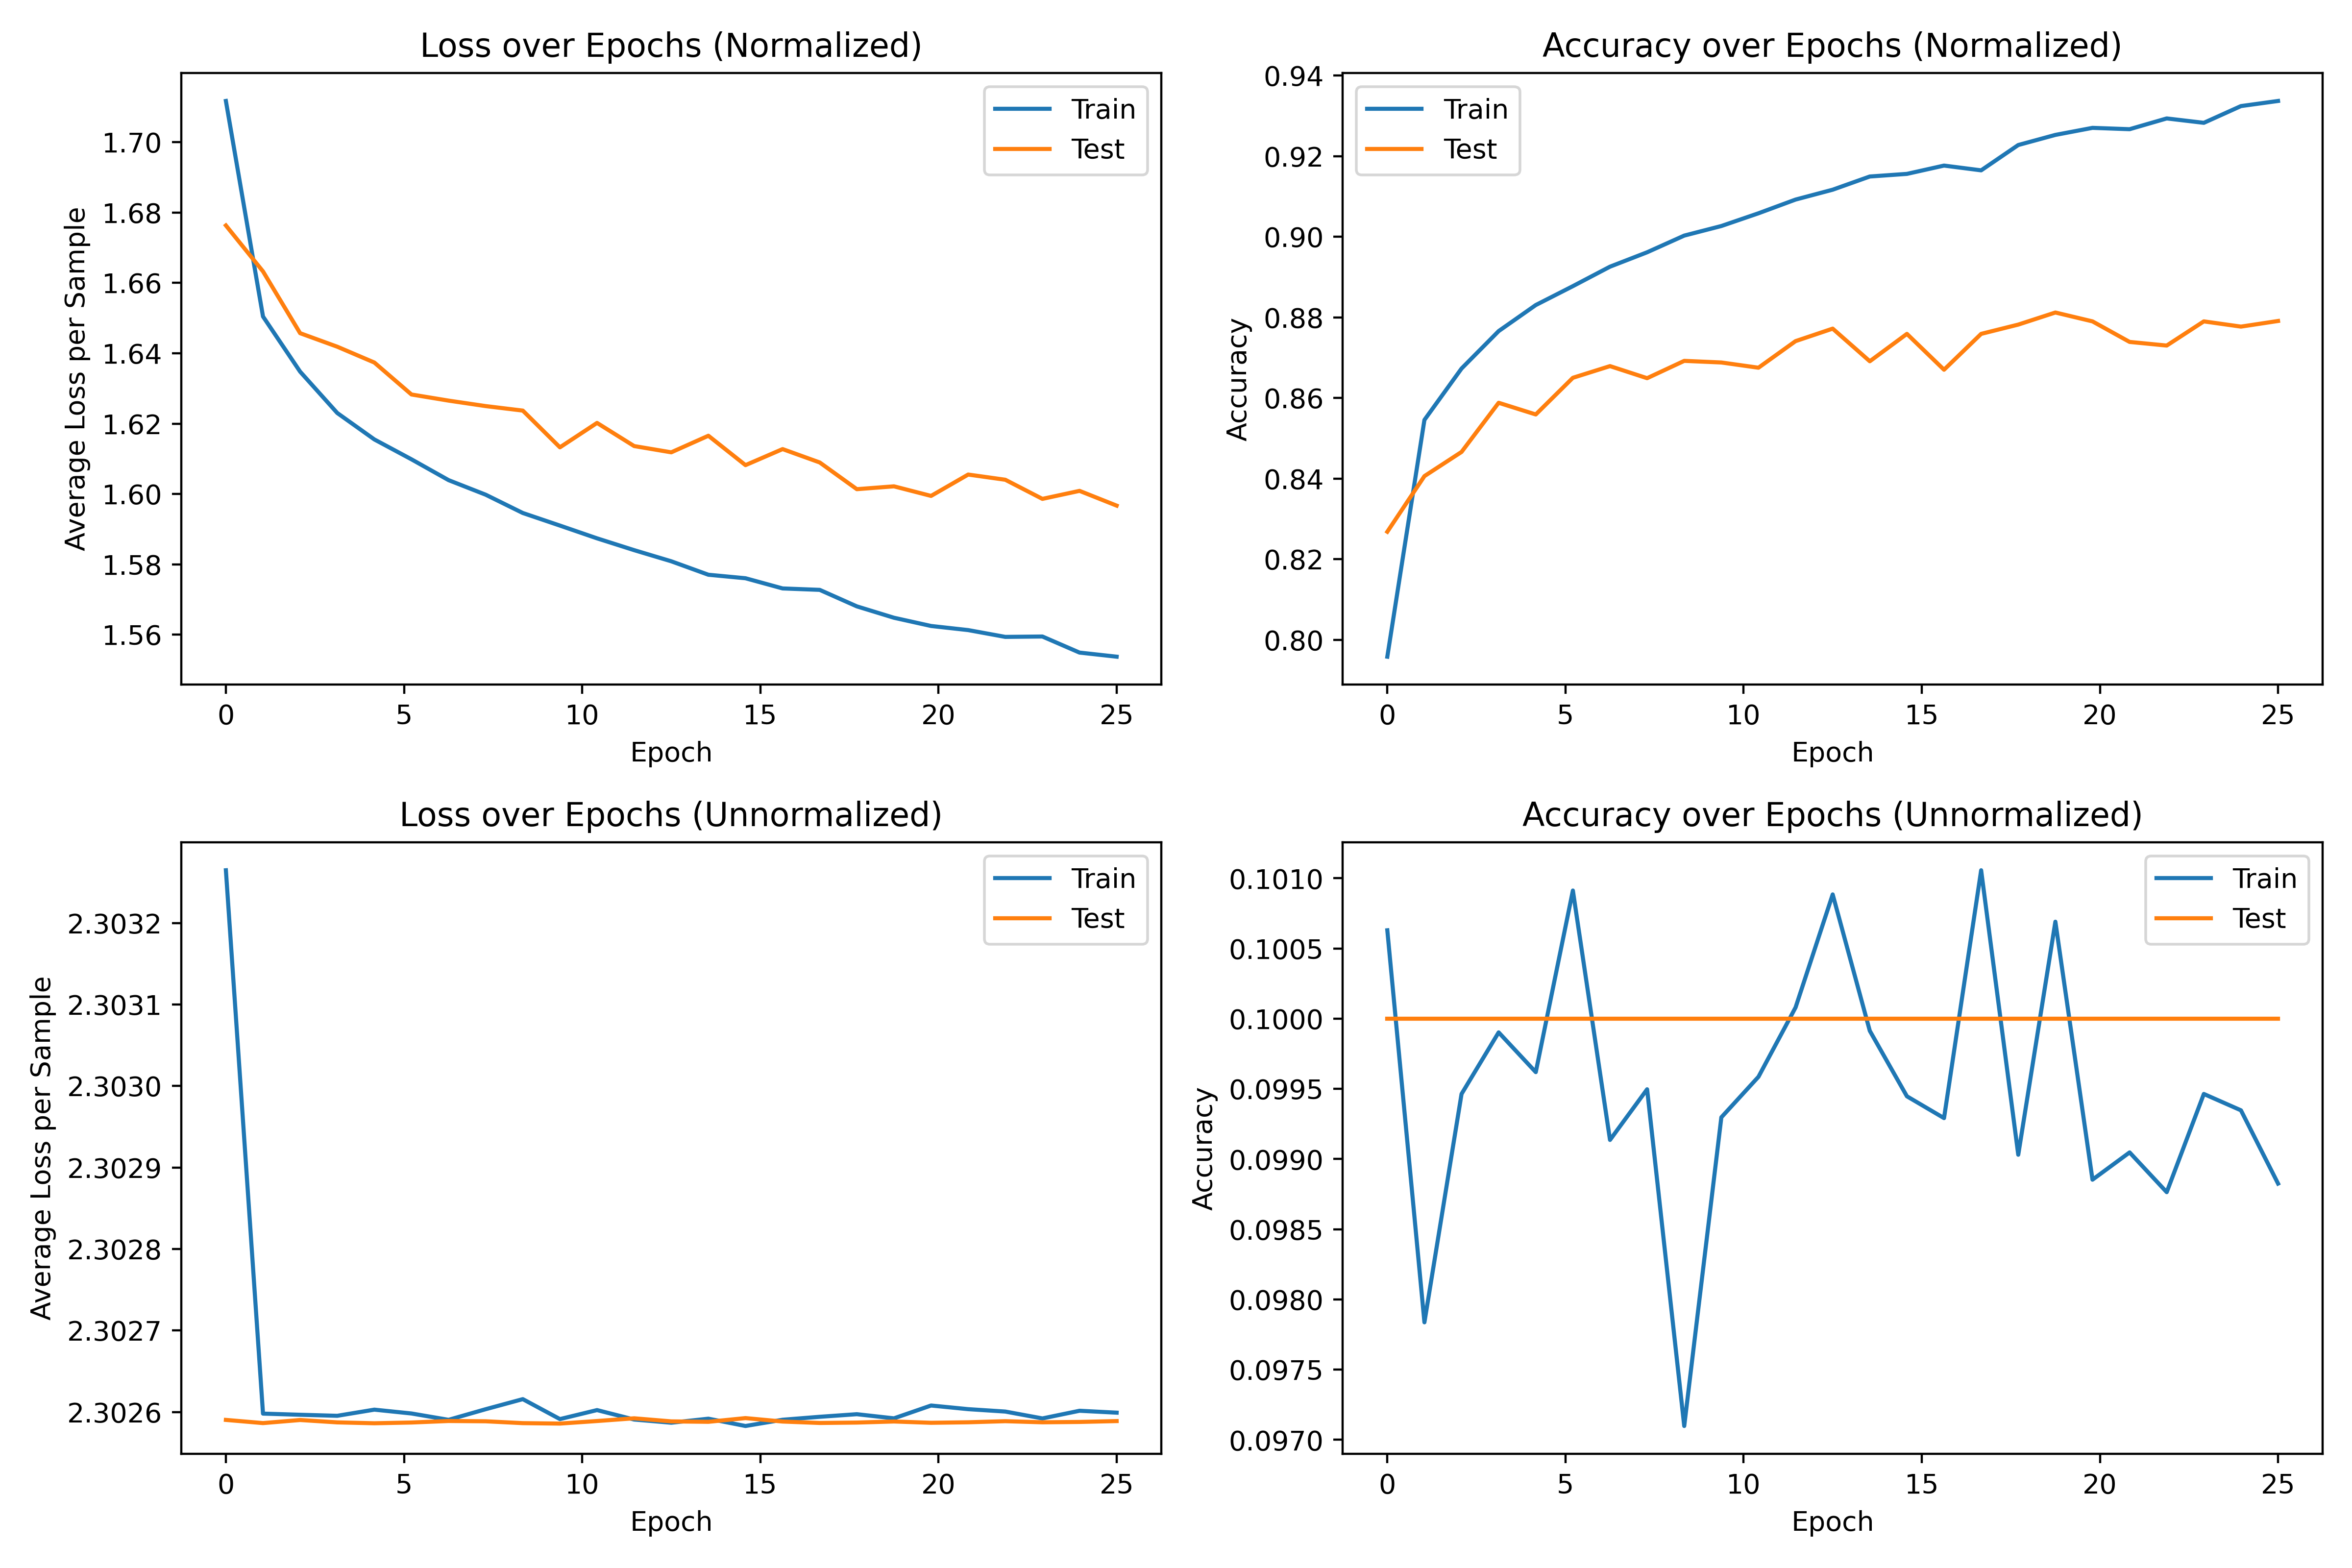

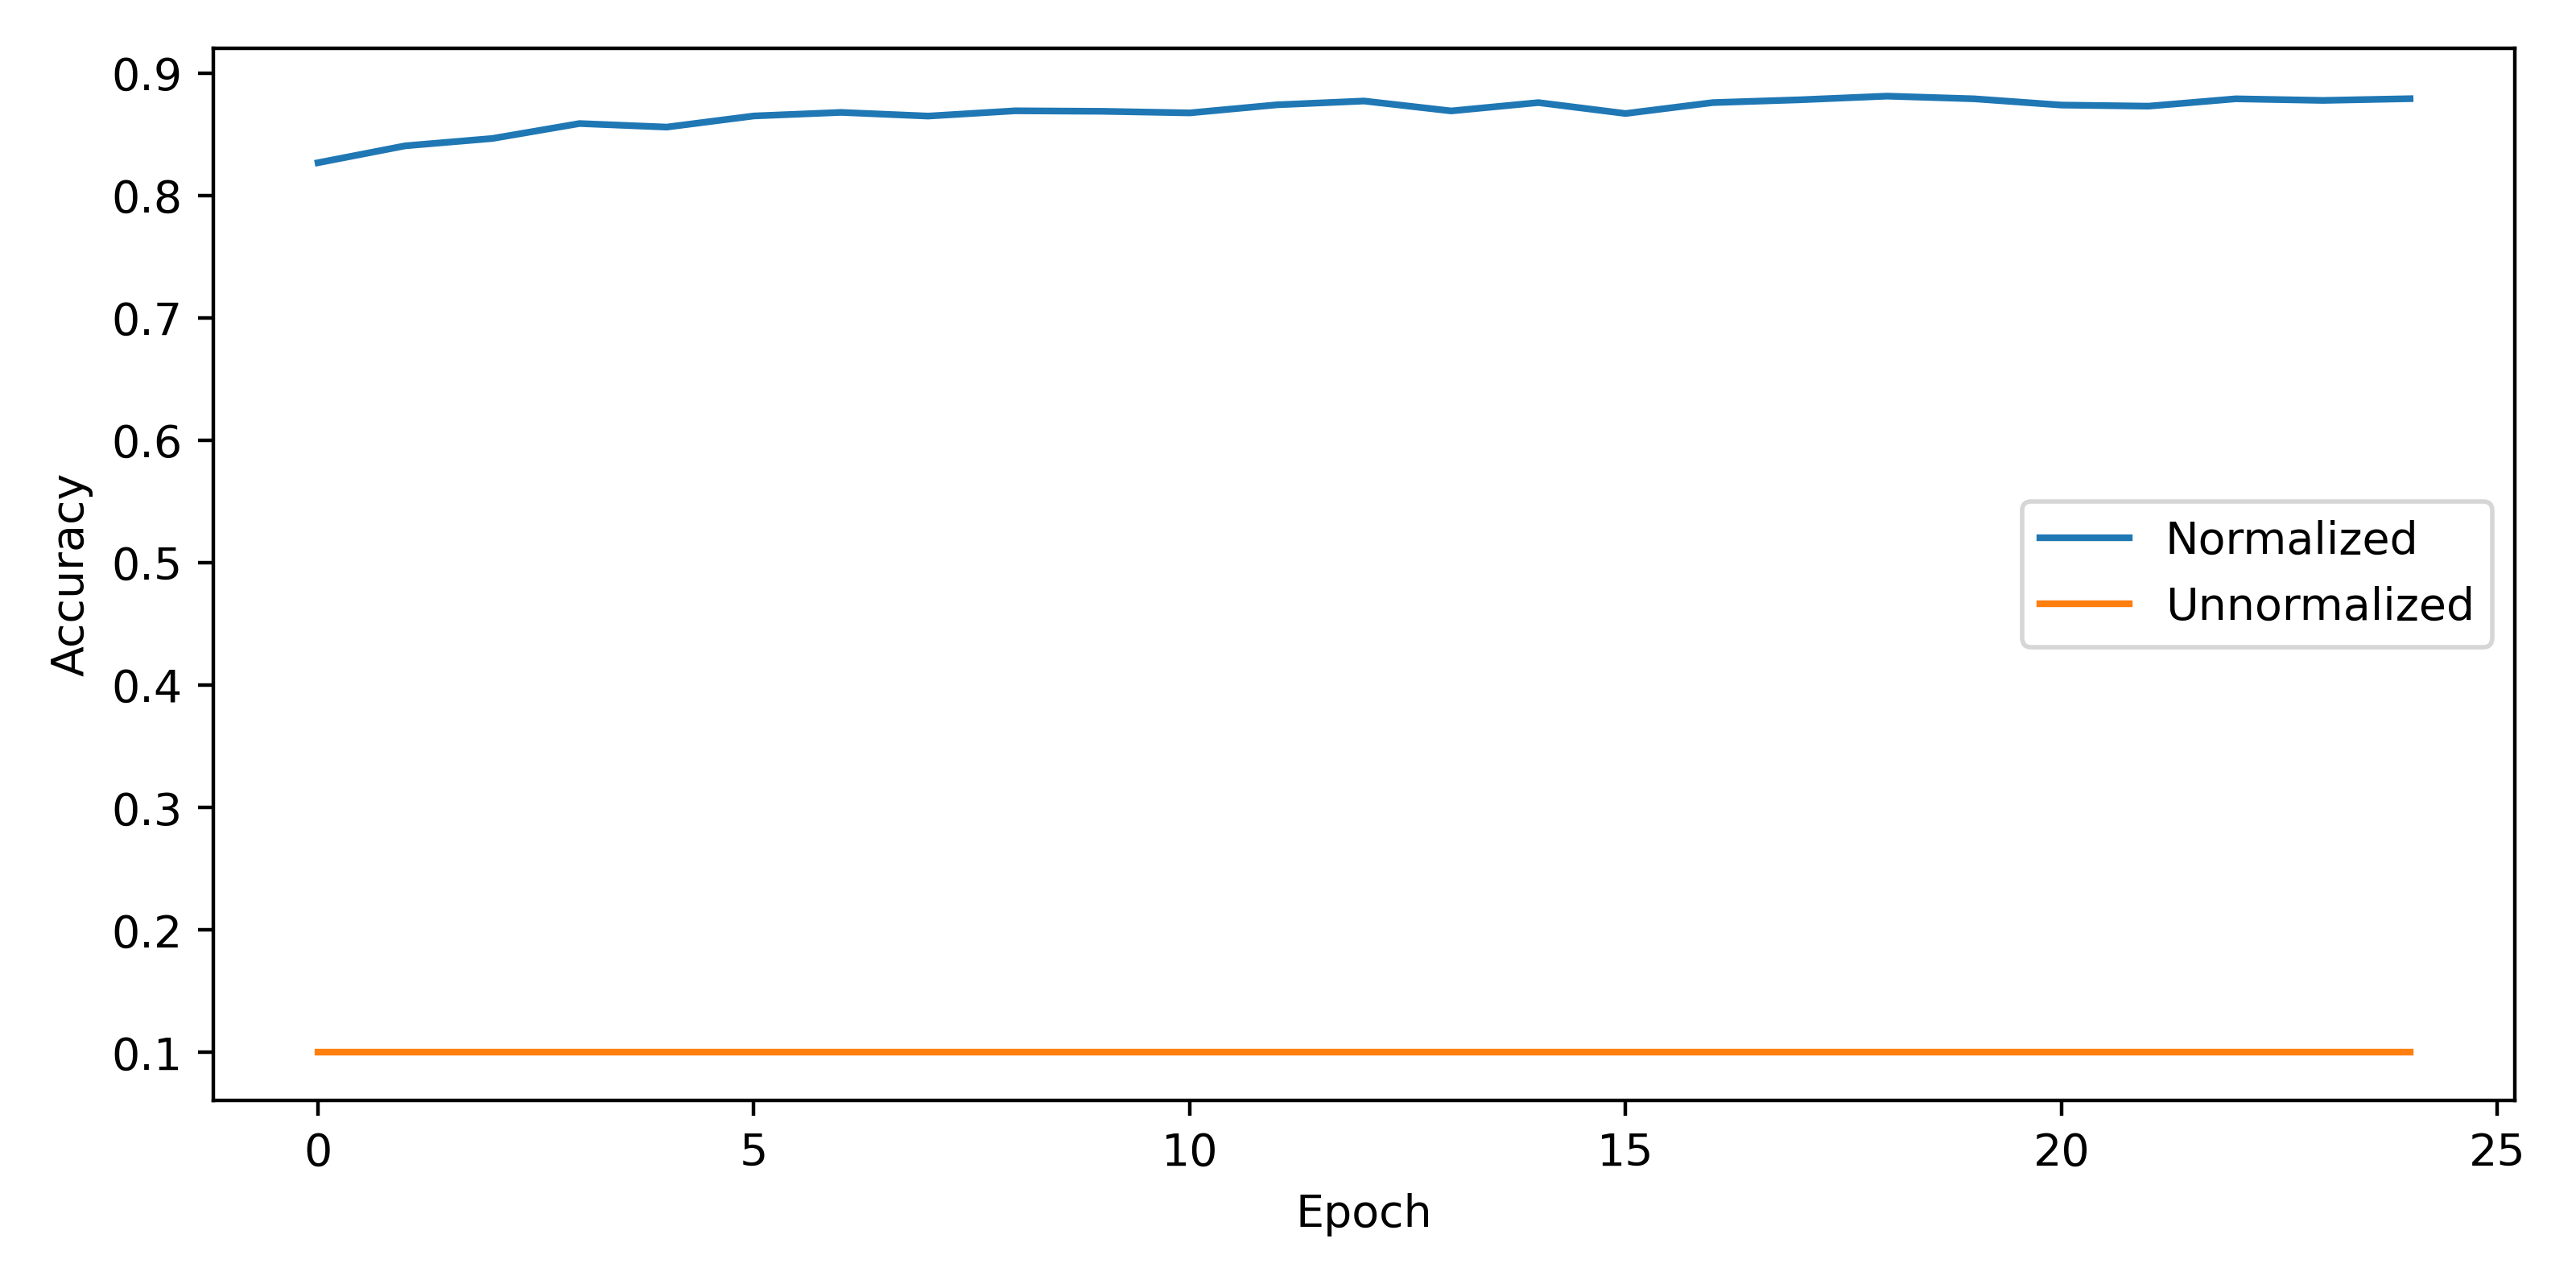

In [43]:
try:
    histories = pickle.load(open('out/exp5/histories.pickle', 'rb'))
    final_accuracies = pickle.load(open('out/exp5/final_accuracies.pickle', 'rb'))

    print('Final test accuracies:')
    for norm, acc in final_accuracies:
        print(f"Model with {norm}: {acc:.4f}\n")

    # plots
    img_histories = Image(filename='out/exp5/training_histories.png') 
    img_accuracies = Image(filename='out/exp5/accuracies.png')
    display(img_histories, img_accuracies)

except FileNotFoundError:
    print('Experiment 5 results not found. Run experiment first.')

# Experiment 6: Convolutional Neural Networks
Using PyTorch, create a convolutional neural network (CNN) with 2 convolutional and 2 fully connected layers. Although you are free in your choice of the hyperparameters of the convolutional layers, set the number of units in the fully connected layers to be 128. Also, set the activations in all of the layers to be ReLU. Train this CNN on the Fashion MNIST dataset. Does using a CNN increase/decrease the accuracy compared to using MLPs? Provide comments on your results.


### Param Grid Search

We performed a grid search for the following parameters and design choices:
```python
param_grid = {
    'conv1_out': [16, 32],          # number of output channels for conv1
    'conv2_out': [32, 64],          # number of output channels for conv2
    'stride': [1],                  # stride for conv1 and conv2 (set to 1 as images are small)
    'kernel_size': [3, 5],          # kernel size for conv1 and conv2
    'padding': [1, 2],              # padding for conv1 and conv2
    'optimizer': ['SGD'],           # optimizer
    'lr': [0.001, 0.01],            # learning rate
    'momentum': [0.0, 0.5, 0.9]     # momentum
    'batch_size': [16, 32, 64],     # batch size
    'epochs': [5]                   # number of epochs (if less are better, can still be observed)
}
```

In [52]:
try:
    grid_search_results = pd.read_csv('out/grid_search/cnn/grid_search_results.csv')

    # sort by validation accuracy 
    grid_search_results.sort_values(by='val_accuracy', ascending=False, inplace=True)

    # tighten table
    grid_search_results.drop(columns=['optimizer'], inplace=True)
    grid_search_results.rename(columns={'val_accuracy': 'test_acc'}, inplace=True)
    grid_search_results.rename(columns={'kernel_size': 'kernel'}, inplace=True)
    grid_search_results.rename(columns={'batch_size': 'bs'}, inplace=True)
    grid_search_results.rename(columns={'epochs': 'ep'}, inplace=True)
    grid_search_results.rename(columns={'conv1_out': 'conv1'}, inplace=True)
    grid_search_results.rename(columns={'conv2_out': 'conv2'}, inplace=True)

    print(grid_search_results.head(20))

except FileNotFoundError:
    print('Experiment 6 grid search results not found.')

     conv1  conv2  stride  kernel  padding    lr  momentum  bs  ep  test_acc
88      16     64       1       3        1  0.01       0.9  32   5  0.923222
286     32     64       1       5        2  0.01       0.9  32   5  0.920222
250     32     64       1       3        2  0.01       0.9  32   5  0.919889
159     32     32       1       3        1  0.01       0.9  16   5  0.918778
232     32     64       1       3        1  0.01       0.9  32   5  0.918778
87      16     64       1       3        1  0.01       0.9  16   5  0.918556
142     16     64       1       5        2  0.01       0.9  32   5  0.918444
233     32     64       1       3        1  0.01       0.9  64   5  0.916444
177     32     32       1       3        2  0.01       0.9  16   5  0.916444
106     16     64       1       3        2  0.01       0.9  32   5  0.916222
285     32     64       1       5        2  0.01       0.9  16   5  0.916222
231     32     64       1       3        1  0.01       0.9  16   5  0.915556

### Run Experiment

In [45]:
if RUN_EXP:
    # extract best params from dataframe
    optimizer_kwargs = {
        'lr': 0.01, 
        'momentum': 0.9,
        }
    conv1_out = 32
    conv2_out = 64
    stride = 1
    kernel = 3
    padding = 2
    batch_size = 16
    epochs = 5
    optimizer = 'SGD'
    exp6(optimizer_kwargs, conv1_out=conv1_out, conv2_out=conv2_out, stride=stride, kernel=kernel, padding=padding, epochs=epochs, batch_size=batch_size, verbose=True)

### Results

Final accuracy: 91.4%


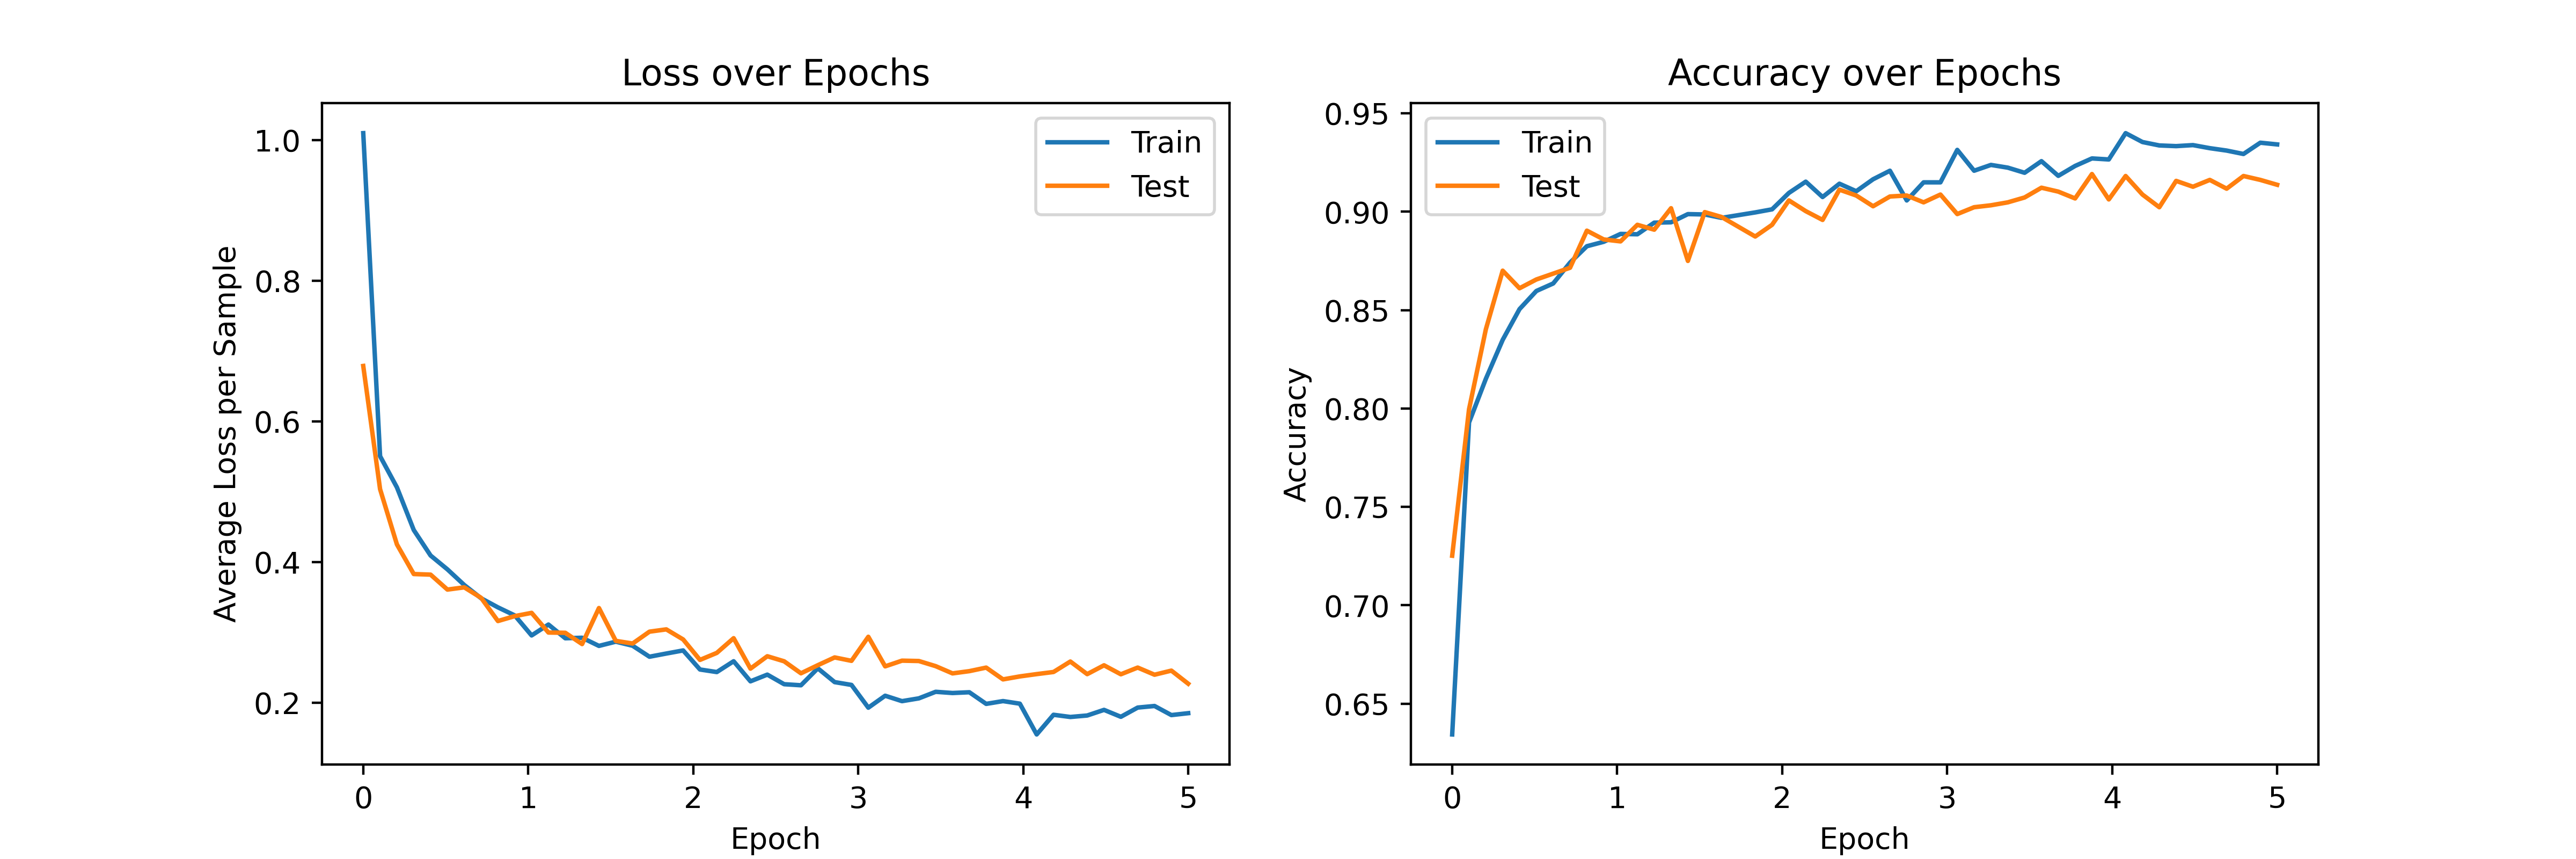

In [46]:
try:
    exp6_history = pickle.load(open('out/exp6/history.pickle', 'rb'))
    exp6_final_accuracy = pickle.load(open('out/exp6/final_accuracy.pickle', 'rb'))
    # convert acc to % and print
    exp6_final_accuracy *= 100
    print(f'Final accuracy: {exp6_final_accuracy}%')    
    img = Image(filename='out/exp6/training_history.png')
    display(img)
except FileNotFoundError:
    print('Experiment 6 results not found. Run experiment first.')

# Experiment 7: CIFAR-10
ow using the CIFAR-10 dataset, train an MLP using your implementation (with whatever layer dimensions you like), and a CNN with the same architecture restrictions as in (6). How does using a CNN increase/decrease the accuracy compared to using MLPs on this dataset?


### Run Experiment

In [47]:
if RUN_EXP:
    params_mlp = {
        'hidden_layer_size': 128,
        'epochs': 25,
        'batch_size': 128,
        'lr': 0.01,
        'momentum': 0.95,
        'decay': 1e-7,
        'optimizer': 'SGD'
    }
    params_cnn = {
        'conv1_out': 32,
        'conv2_out': 64,
        'stride': 1,
        'kernel_size': 3,
        'padding': 2,
        'epochs': 5,
        'batch_size': 16,
        'lr': 0.01,
        'momentum': 0.9,
        'optimizer': 'SGD'
    }
    exp7(params_mlp, params_cnn, verbose=True)

### Results

Final test accuracy (MLP): 50.629999999999995%
Final CNN accuracy (CNN): 71.21%
MLP training history:


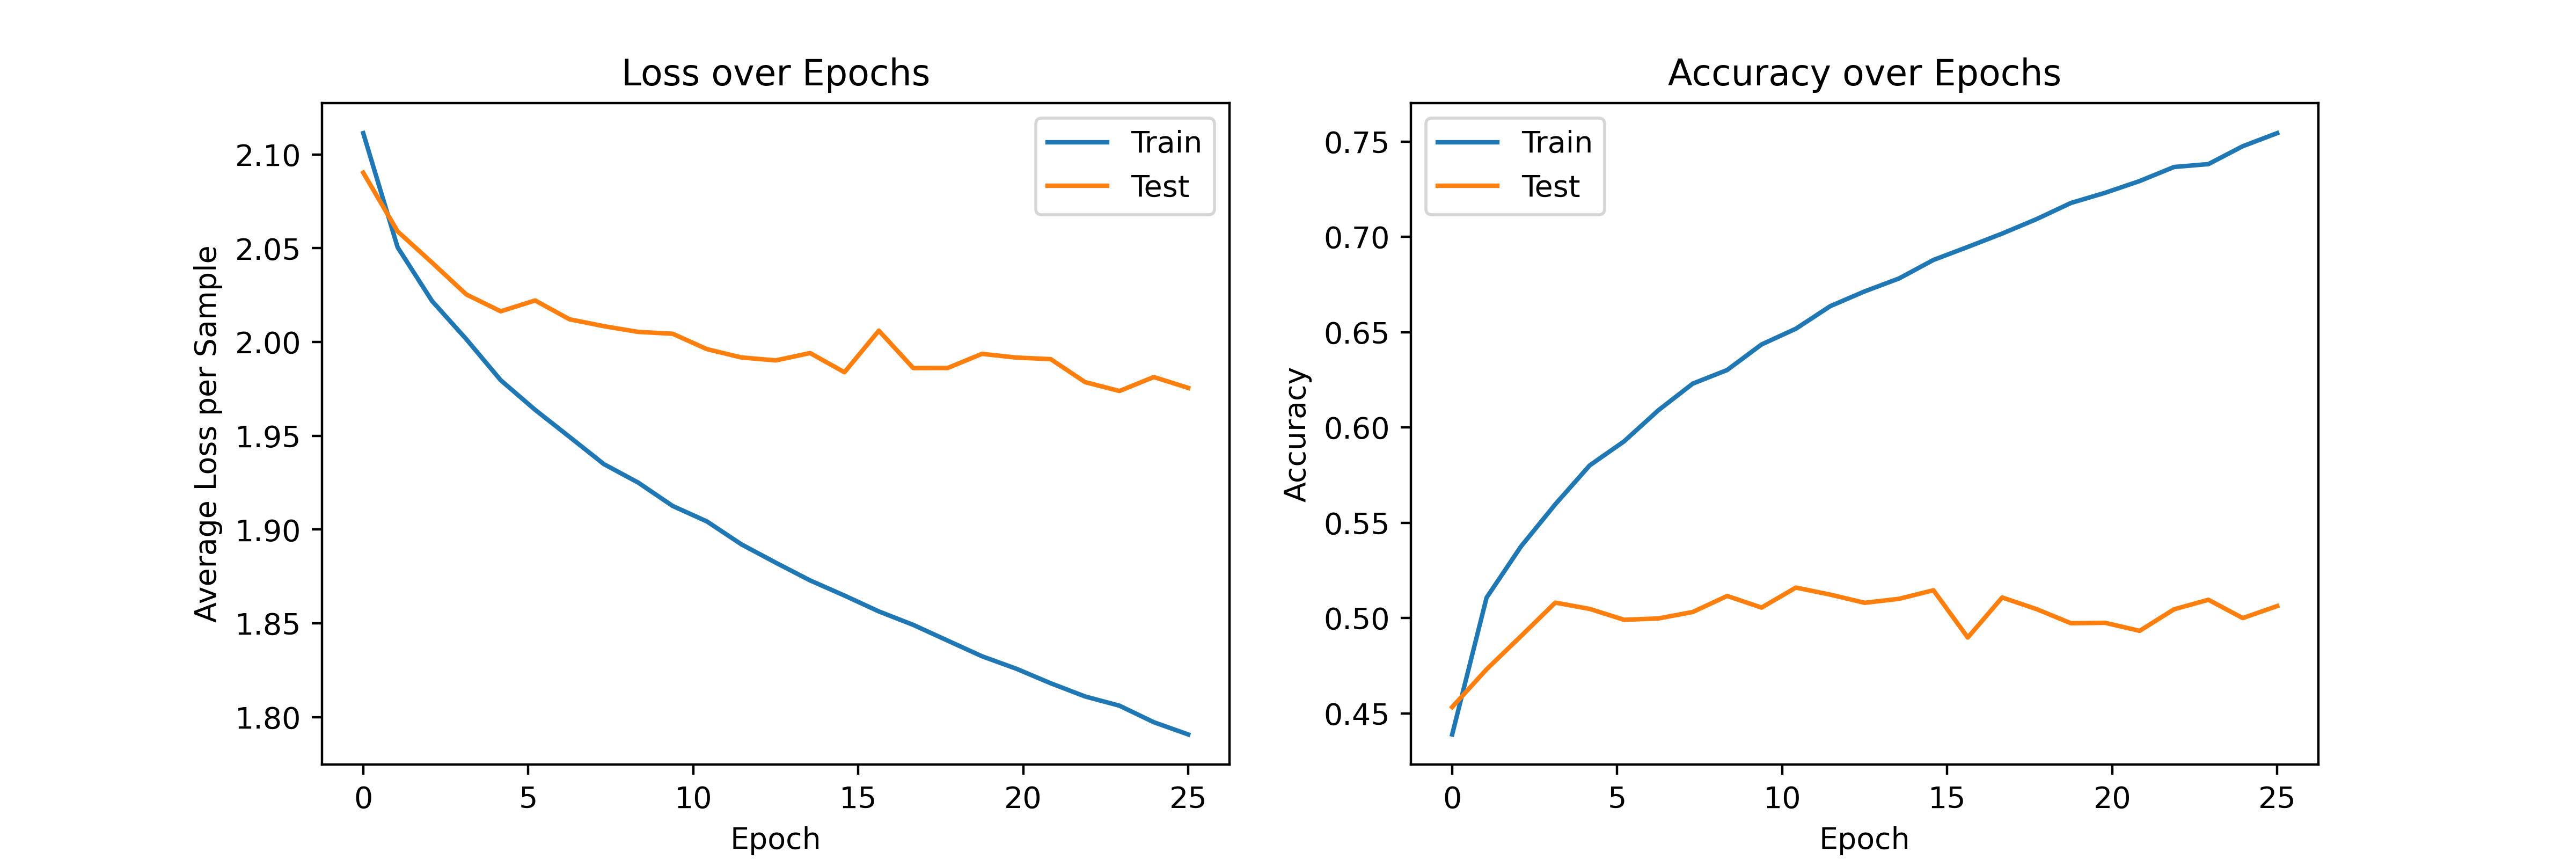

CNN training history:


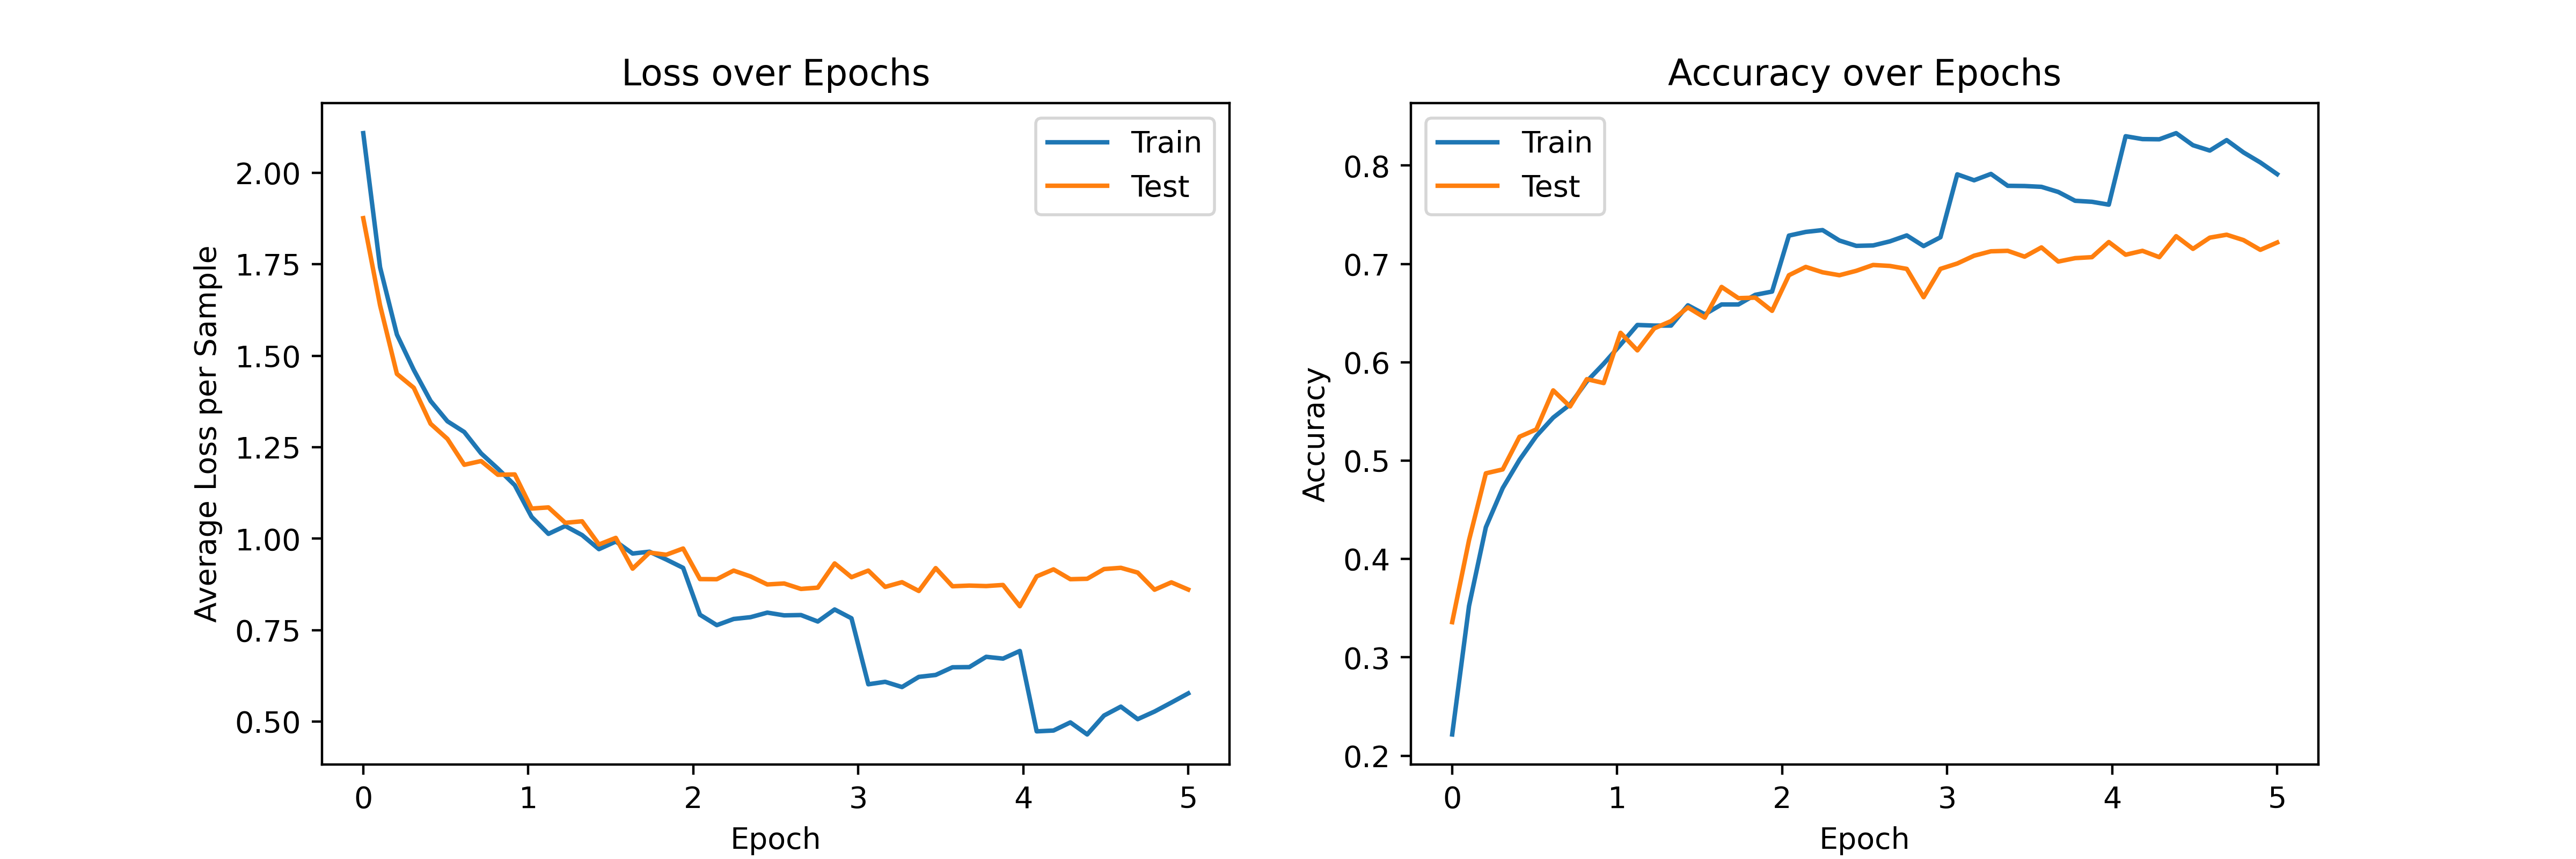

In [48]:
try:
    exp7_history = pickle.load(open('out/exp7/histories.pickle', 'rb'))
    exp7_final_accuracies = pickle.load(open('out/exp7/final_accuracies.pickle', 'rb'))
    exp7_final_accuracies = [acc * 100 for acc in exp7_final_accuracies]
    print(f'Final test accuracy (MLP): {exp7_final_accuracies[0]}%')
    print(f'Final CNN accuracy (CNN): {exp7_final_accuracies[1]}%')
    img_mlp = Image(filename='out/exp7/mlp_training_history.png')
    img_cnn = Image(filename='out/exp7/cnn_training_history.png')
    print('MLP training history:')
    display(img_mlp)
    print('CNN training history:')
    display(img_cnn)
except FileNotFoundError:
    print('Experiment 7 results not found. Run experiment first.')

# Experiment 8: Optimizer
In your CNN implemented with PyTorch, investigate the effects of optimizer on performance on the CIFAR- 10 dataset. Using an SGD optimizer, set the momentum factor to zero, and then try to increase it. How does changing this value impact the training and performance of the network in terms of convergence speed, final accuracy, and stability? How do these compare if you instead use an Adam optimizer?

### Run Experiment

In [49]:
if RUN_EXP:
    lr_sgd = 0.01
    lr_adam = 0.001
    conv1_out = 32
    conv2_out = 64
    stride = 1
    kernel = 3
    padding = 2
    batch_size = 16
    epochs = 5
    exp8(lr_sgd=lr_sgd, lr_adam=lr_adam, conv1_out=conv1_out, conv2_out=conv2_out, stride=stride, kernel=kernel, padding=padding, epochs=epochs, batch_size=batch_size, verbose=True)

### Results

Final test accuracies:
SGD with momentum = 0.0: 56.69 %
SGD with momentum = 0.5: 70.81 %
SGD with momentum = 0.75: 70.15
SGD with momentum = 0.9: 71.59 %
SGD with momentum = 0.99: 24.77 %
Adam: 71.41999999999999 %


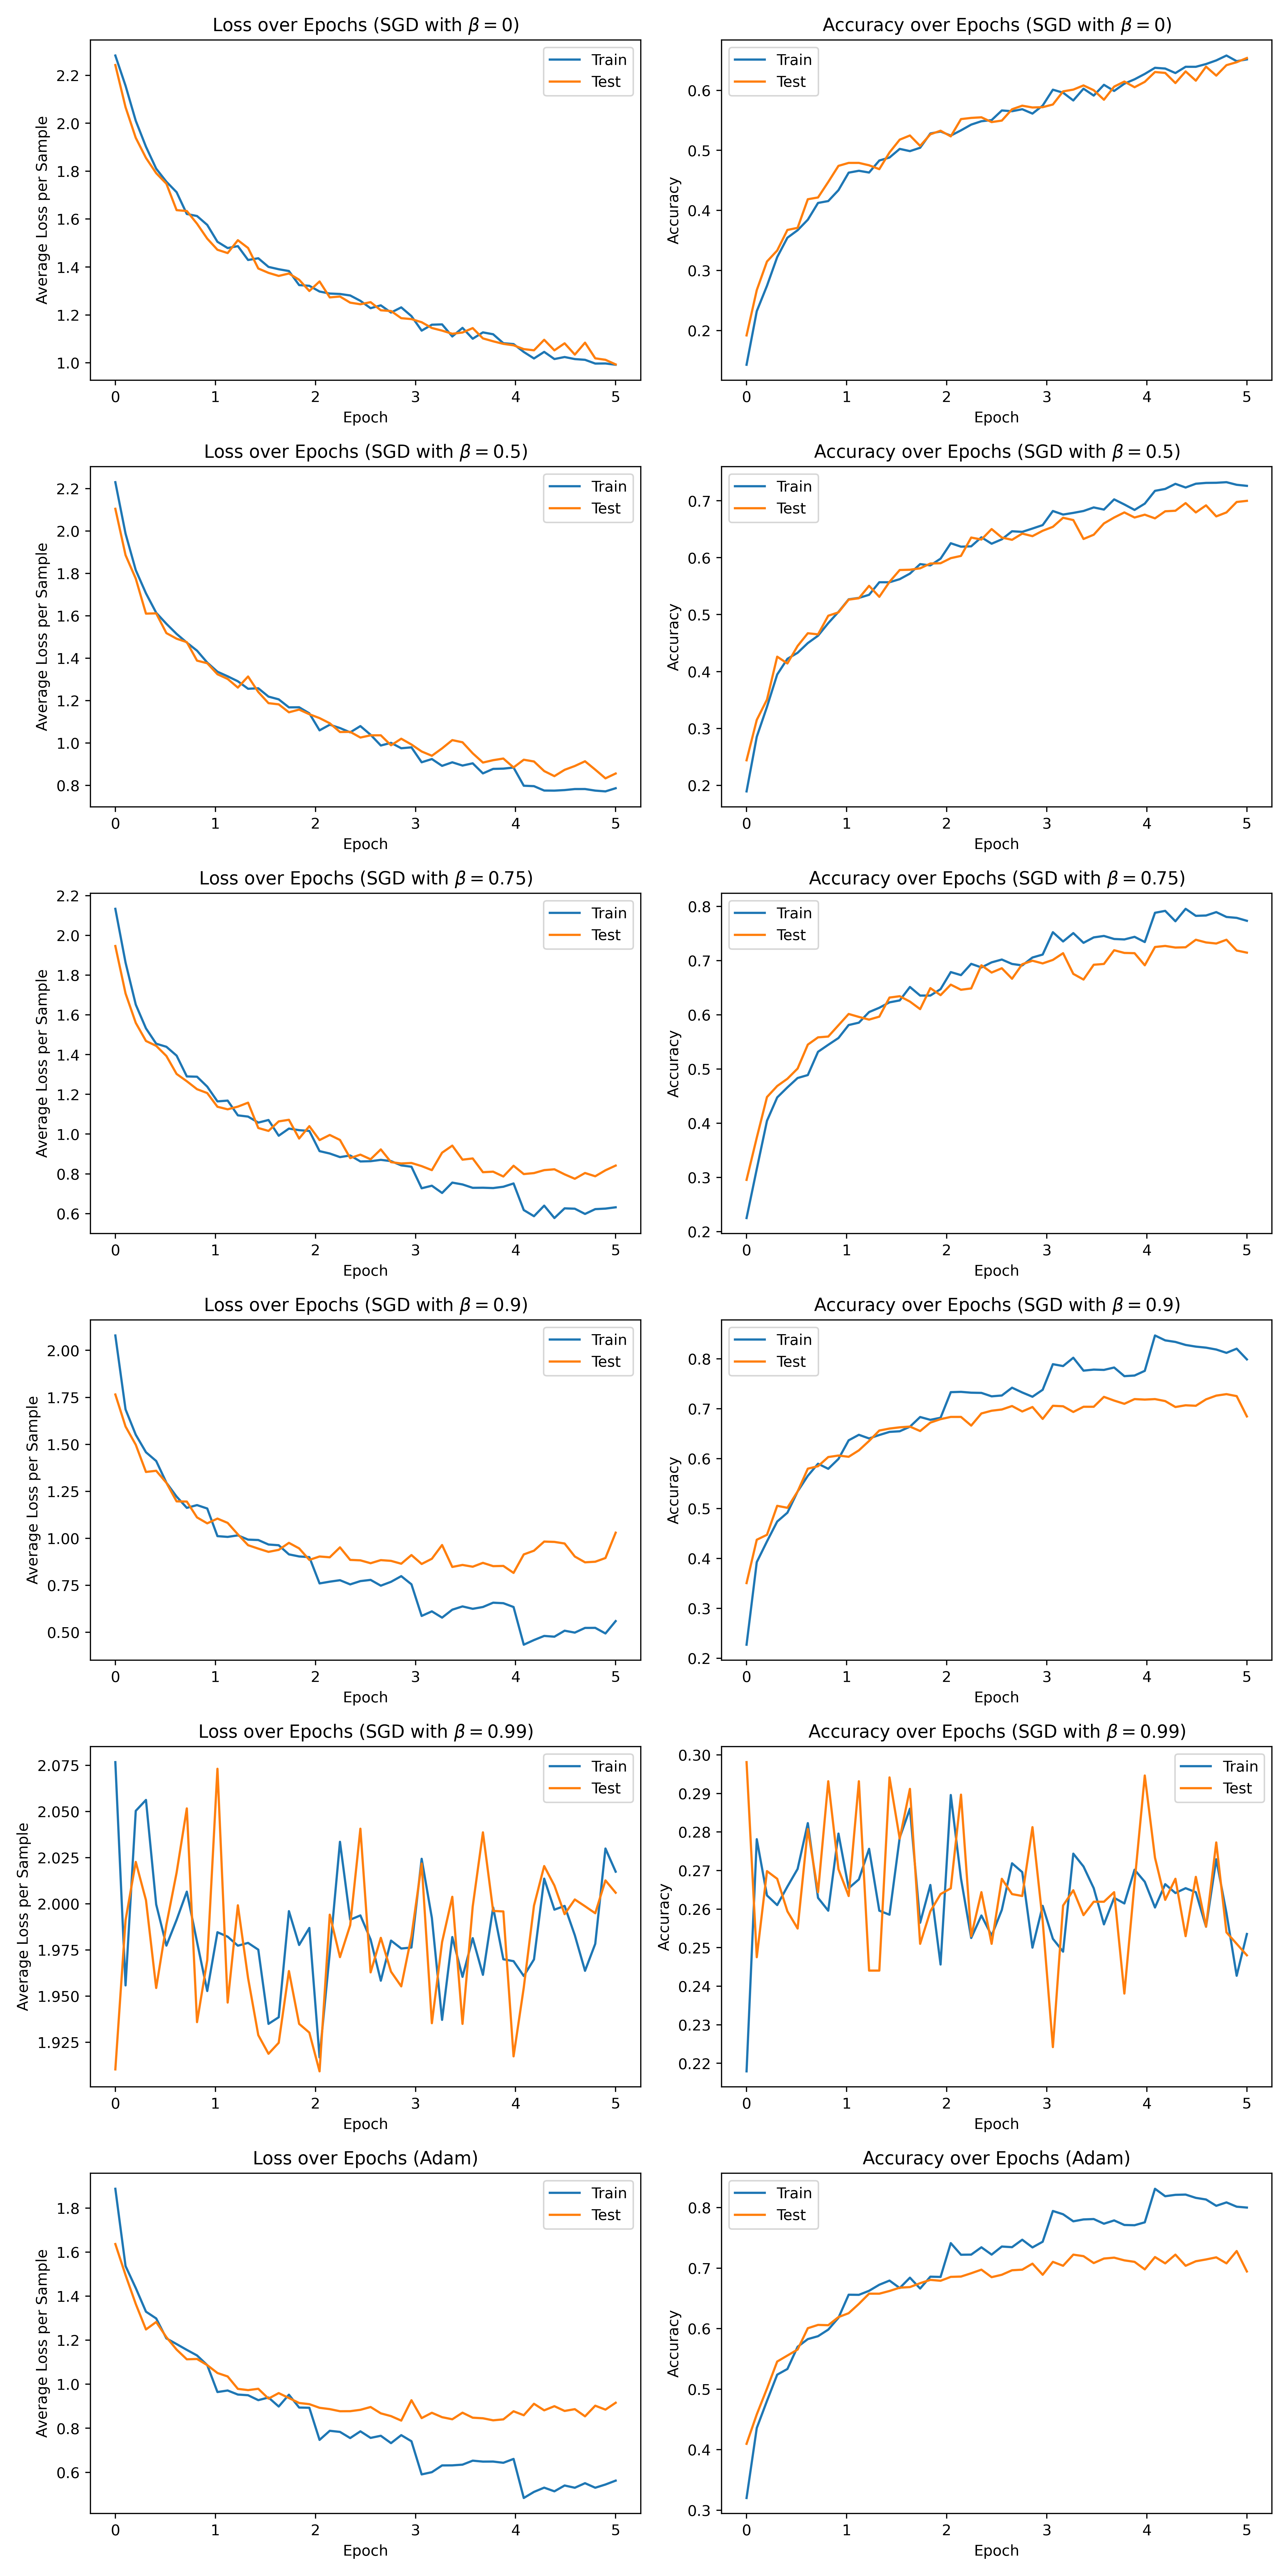

In [6]:
try:
    exp8_histories = pickle.load(open('out/exp8/histories.pickle', 'rb'))
    exp8_final_accuracies = pickle.load(open('out/exp8/final_accuracies.pickle', 'rb'))
    exp8_final_accuracies = [acc * 100 for acc in exp8_final_accuracies]
    print('Final test accuracies:')
    print(f'SGD with momentum = 0.0: {exp8_final_accuracies[0]} %')
    print(f'SGD with momentum = 0.5: {exp8_final_accuracies[1]} %')
    print(f'SGD with momentum = 0.75: {exp8_final_accuracies[2]}')
    print(f'SGD with momentum = 0.9: {exp8_final_accuracies[3]} %')
    print(f'SGD with momentum = 0.99: {exp8_final_accuracies[4]} %')
    print(f'Adam: {exp8_final_accuracies[5]} %')
    img = Image(filename='out/exp8/training_histories.png')
    # plot compare accuracies
    titles = ['SGD with momentum = 0.0', 'SGD with momentum = 0.5', 'SGD with momentum = 0.75', 'SGD with momentum = 0.9', 'SGD with momentum = 0.99', 'Adam']
    #compare_accuracies(exp8_histories, titles, num_saves_per_epoch=150, figsize=(8,4), plot_train=False, show=True)
    display(img)
except FileNotFoundError:
    print('Experiment 8 results not found. Run experiment first.')

# Experiment 9: Pre-trained Model
(BONUS: Counts for open-ended marks) Load a pre-trained model that you see fit (e.g., a ResNet) using Py- Torch, and then freeze all the convolutional layers and remove all the fully connected ones. Add a number of fully connected layers of your choice right after the convolutional layers. Train only the fully connected layers of the pre-trained model on the CIFAR-10 dataset. How does this pre-trained model compare to the best MLP in part 1 and to the regular CNN in part 5 in terms of the accuracy? How does it compare to the previous models in terms of the required training time? Justify your choice of how many fully connected layers that you have added to the pre-trained model through careful experiments.

In [51]:
# although code is implemented in main.py, not finished